# Lending Club Case Study

#### Importing Necessary Library

In [1]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings


#### DataFrame display settings

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.width', None)

warnings.filterwarnings('ignore') # to ignore the warnings

# Setting style for seaonrn
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

### Data Loading

In [3]:
# load the data  and display first 5 rows 

#### low_memory=False: Reads the entire file at once, which uses more memory but is generally faster 
#### and more accurate for type inference.

lendingdata = pd.read_csv("loan/loan.csv",low_memory=False)

lendingdata.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# Get the shape of the DataFrame which gives num of rows and columns 

lendingdata.shape

(39717, 111)

In [5]:
# summary of dataframe
lendingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Cleaning

1. Fix columns with NaN values
2. check for duplicates
3. Fix missing values
4. Standardise values


In [546]:
# Check last rows for any footer data

lendingdata.tail()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,issue_year,issue_month
39712,2500,36 months,8.07,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,CO,11.33,0,13,0,13.1,0.0,2007,Jul
39713,8500,36 months,10.28,C,C1,3 years,RENT,18000.0,Not Verified,Fully Paid,credit_card,NC,6.40,1,6,0,26.9,0.0,2007,Jul
39714,5000,36 months,8.07,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,11,0,19.4,0.0,2007,Jul
39715,5000,36 months,7.43,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,other,MD,3.72,0,17,0,0.7,0.0,2007,Jul
39716,7500,36 months,13.75,E,E2,< 1 year,OWN,22000.0,Not Verified,Fully Paid,debt_consolidation,MA,14.29,1,7,0,51.5,0.0,2007,Jun


In [365]:
# Check for null values

null_values_count = lendingdata.isnull().sum()
print(null_values_count)


loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
open_acc                0
pub_rec                 0
revol_util              0
pub_rec_bankruptcies    0
issue_year              0
issue_month             0
dtype: int64


#### Check For Duplicates

In [8]:
# check for duplicates

lendingdata.duplicated().sum()


0

#### Drop Columns with NaN Values

In [9]:
#dropping columns where all valaues are NaN

lendingdata.dropna(how='all', axis=1,inplace=True)

In [10]:
lendingdata.shape

(39717, 57)

In [11]:
# checking the percentage of null values in data

(lendingdata.isnull().sum() / len(lendingdata)) * 100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [12]:
# removing columns where the % of null values is more than 50

lendingdata.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'],inplace=True)


In [13]:
lendingdata.shape

(39717, 54)

In [14]:
lendingdata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Dropping below columns which are not useful for analysis

In [17]:
# delinq_amnt - as all values are 0

lendingdata.drop(columns=['delinq_amnt'],inplace=True)

# chargeoff_within_12_mths -  all vlaues are 0 and the rest NANs
lendingdata.drop(columns=['chargeoff_within_12_mths'],inplace=True)


# acc_now_delinq - as all values are 0
lendingdata.drop(columns=['acc_now_delinq'],inplace=True)


# application_type - as it has only single value 'Indovidual'
lendingdata.drop(columns=['application_type'],inplace=True)


# policy_code - as all values have value 1
lendingdata.drop(columns=['policy_code'],inplace=True)

# collections_12_mths_ex_med - all values are 0 and NaN
lendingdata.drop(columns=['collections_12_mths_ex_med'],inplace=True)

# initial_list_status - all values are marked as 'f' (funded)
lendingdata.drop(columns=['initial_list_status'],inplace=True)

# tax_liens - all values have value 0 and NaN
lendingdata.drop(columns=['tax_liens'],inplace=True)

# total_pymnt - for fully paid this amt will be greater than loan amt and for charged off the amput will be less
lendingdata.drop(columns=['total_pymnt'],inplace=True)

In [18]:
# below columns not important in assessing the risky loan applicant
 
    
drop_cols =  ['last_pymnt_amnt','last_pymnt_d','collection_recovery_fee', 'recoveries','total_rec_late_fee','total_acc',
         'total_rec_int','total_rec_prncp','total_pymnt_inv','out_prncp_inv','out_prncp','member_id','funded_amnt_inv','emp_title',
         'pymnt_plan', 'url' , 'desc', 'title' ,'zip_code', 'earliest_cr_line', 'inq_last_6mths','last_credit_pull_d','id','revol_bal','funded_amnt','installment']

lendingdata.drop(columns=drop_cols,inplace=True)



In [19]:
lendingdata.shape

(39717, 19)

In [20]:
lendingdata.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies
0,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,3,0,83.70%,0.0
1,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,3,0,9.40%,0.0
2,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2,0,98.50%,0.0
3,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,10,0,21%,0.0
4,3000,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,15,0,53.90%,0.0


In [21]:
lendingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_length            38642 non-null  object 
 6   home_ownership        39717 non-null  object 
 7   annual_inc            39717 non-null  float64
 8   verification_status   39717 non-null  object 
 9   issue_d               39717 non-null  object 
 10  loan_status           39717 non-null  object 
 11  purpose               39717 non-null  object 
 12  addr_state            39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  delinq_2yrs           39717 non-null  int64  
 15  open_acc           

In [22]:
# pub_rec_bankruptcies, revol_util , emp_length has null or NA values


##### missing value treatment for pub_rec_bankruptcies 

In [23]:

print(lendingdata['pub_rec_bankruptcies'].value_counts())
print(lendingdata['pub_rec_bankruptcies'].isnull().sum())

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64
697


In [24]:
# Impute missing values for pub_rec_bankruptcies

mode = lendingdata['pub_rec_bankruptcies'].mode()[0]
lendingdata['pub_rec_bankruptcies'].fillna(mode,inplace=True)


In [25]:
lendingdata['pub_rec_bankruptcies'].isnull().sum()

0

##### missing value treatment for emp_length

In [26]:
lendingdata['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [27]:
lendingdata['emp_length'].isnull().sum()

1075

In [28]:
lendingdata['emp_length'].fillna('0',inplace=True)

In [29]:
lendingdata['emp_length'].isnull().sum()

0

##### missing value treatement for revol_util

In [30]:
lendingdata['revol_util'].isnull().sum()

50

In [31]:
# before imputing fixing the values in revol_util , removing % and converting to float

lendingdata['revol_util'] = lendingdata['revol_util'].str.replace('%', '').astype(float)


In [32]:
# calculating mean and median for revol_util

median = lendingdata['revol_util'].median()
print("Median - ",median)
mean  = lendingdata['revol_util'].mean()
print("Mean - ",mean)

Median -  49.3
Mean -  48.83215241888723


In [33]:
# imputing missing values with median for revol_util

lendingdata['revol_util'].fillna(lendingdata['revol_util'].median(),inplace=True)

In [34]:
lendingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_length            39717 non-null  object 
 6   home_ownership        39717 non-null  object 
 7   annual_inc            39717 non-null  float64
 8   verification_status   39717 non-null  object 
 9   issue_d               39717 non-null  object 
 10  loan_status           39717 non-null  object 
 11  purpose               39717 non-null  object 
 12  addr_state            39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  delinq_2yrs           39717 non-null  int64  
 15  open_acc           

### Standardise values 

In [35]:
# removing % from int_rate and converting to float type

lendingdata['int_rate'] = lendingdata['int_rate'].str.replace('%', '').astype(float)



In [36]:
lendingdata.head(10)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,3,0,83.7,0.0
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,3,0,9.4,0.0
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2,0,98.5,0.0
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,10,0,21.0,0.0
4,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,15,0,53.9,0.0
5,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,9,0,28.3,0.0
6,7000,60 months,15.96,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,7,0,85.6,0.0
7,3000,36 months,18.64,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,CA,5.35,0,4,0,87.5,0.0
8,5600,60 months,21.28,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,0,11,0,32.6,0.0
9,5375,60 months,12.69,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,TX,18.08,0,2,0,36.5,0.0


In [37]:
# Derive year and month from issue_d

from datetime import date

lendingdata['issue_year']  = pd.to_datetime(lendingdata['issue_d'],format='%b-%y').dt.year


In [38]:
lendingdata['issue_month'] = lendingdata['issue_d'].str.split('-').str[0]

In [39]:
# drop issue_d  columns as we no longer require it

lendingdata.drop(columns='issue_d',inplace=True)

In [40]:
lendingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  float64
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_length            39717 non-null  object 
 6   home_ownership        39717 non-null  object 
 7   annual_inc            39717 non-null  float64
 8   verification_status   39717 non-null  object 
 9   loan_status           39717 non-null  object 
 10  purpose               39717 non-null  object 
 11  addr_state            39717 non-null  object 
 12  dti                   39717 non-null  float64
 13  delinq_2yrs           39717 non-null  int64  
 14  open_acc              39717 non-null  int64  
 15  pub_rec            

In [41]:
## We cannot draw inferences on current loan applicants 
## For comparative analysis we need applicants who have status as "Fully Paid" or "Charged-off"

# Dropping rows where the loan_stat = "Current"

In [42]:
lendingdata = lendingdata[~(lendingdata['loan_status'] == 'Current')]

In [43]:
### The data is cleaned and standardised, we can now proceed with analysis
lendingdata.shape

(38577, 20)

## Removing Outliers

In [44]:
# we will analyse outliers for loan_amnt,int_rate , annual_inc, dti, revol_util

In [45]:
def calculate_upper_lower_bounds(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    print("Q1 of", data.name, '-', Q1)
    print("Q3 of", data.name, '-', Q3)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("Lower bound of", data.name, '-', lower_bound)
    print("Upper bound of", data.name, '-', upper_bound)
    return lower_bound, upper_bound
   

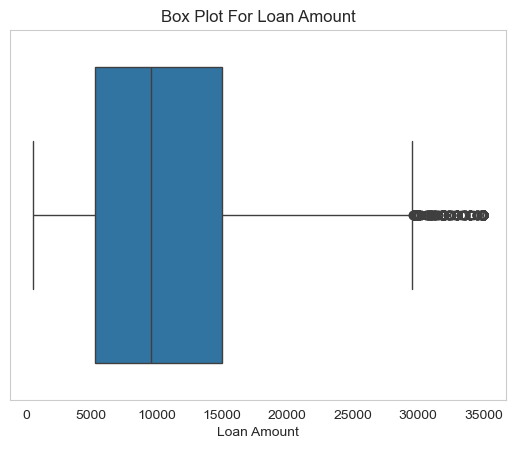

In [46]:
# Box plot for loan_amt
sns.boxplot(x=lendingdata["loan_amnt"])
plt.title('Box Plot For Loan Amount')
plt.xlabel("Loan Amount")
plt.show()

In [47]:
## since the upper bound and max value is almost near we will not drop the records

calculate_upper_lower_bounds(lendingdata["loan_amnt"])
print(lendingdata["loan_amnt"].max())

Q1 of loan_amnt - 5300.0
Q3 of loan_amnt - 15000.0
Lower bound of loan_amnt - -9250.0
Upper bound of loan_amnt - 29550.0
35000


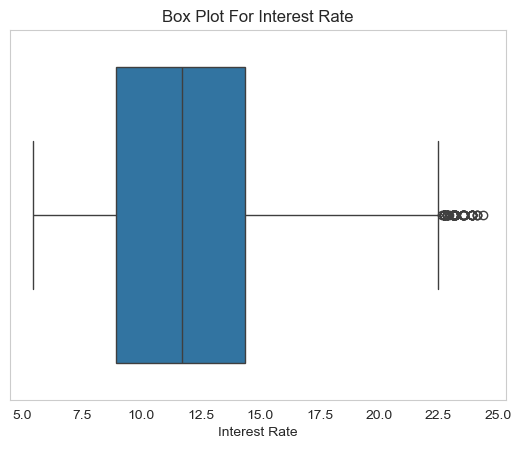

In [48]:
# Box plot for int_rate
sns.boxplot(x=lendingdata["int_rate"])
plt.title('Box Plot For Interest Rate')
plt.xlabel('Interest Rate')
plt.show()

In [49]:
## since the upper bound and max value is almost near we will not drop the records

calculate_upper_lower_bounds(lendingdata["int_rate"])
print(lendingdata["int_rate"].max())

Q1 of int_rate - 8.94
Q3 of int_rate - 14.38
Lower bound of int_rate - 0.7799999999999976
Upper bound of int_rate - 22.540000000000003
24.4


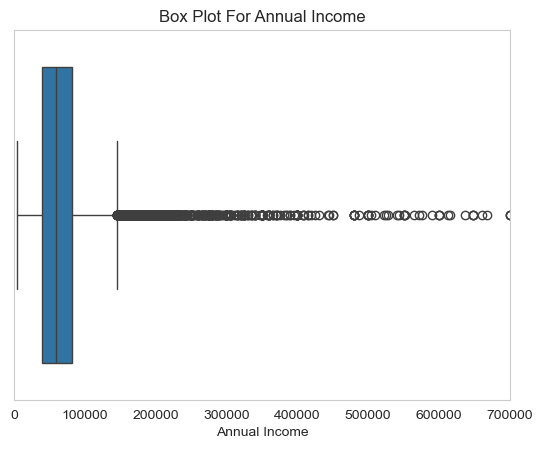

In [50]:
# Box plot for int_rate

sns.boxplot(x=lendingdata["annual_inc"])
plt.title('Box Plot For Annual Income')
plt.xlabel('Annual Income')
plt.xlim(0, 700000) # limiting the x ticks for better plot visibility
plt.show()

In [51]:
lwr,upr = calculate_upper_lower_bounds(lendingdata["annual_inc"])
print(lendingdata["annual_inc"].max())

Q1 of annual_inc - 40000.0
Q3 of annual_inc - 82000.0
Lower bound of annual_inc - -23000.0
Upper bound of annual_inc - 145000.0
6000000.0


In [52]:
outliers_annl_income = lendingdata[(lendingdata["annual_inc"] < lwr) | (lendingdata["annual_inc"] > upr)]
outliers_annl_income.shape

(1762, 20)

In [53]:
# it is not advisable to drop 1762 records 
# so we will go for quantile based computation for removing outliers for annual income

print("shape, before removing outliers on annual income - ", lendingdata.shape)

shape, before removing outliers on annual income -  (38577, 20)


In [54]:
## Removing outliers using percentile method 

percentile_99 = np.percentile(lendingdata["annual_inc"],99)
print("percentile_99 :",percentile_99)

lendingdata = lendingdata[~(lendingdata["annual_inc"] > percentile_99)]

print("shape, after removing outliers on annual income - ", lendingdata.shape)

percentile_99 : 234143.99999999878
shape, after removing outliers on annual income -  (38191, 20)


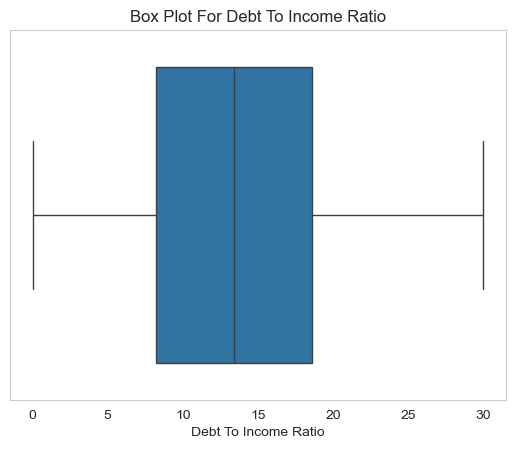

In [55]:
# Box plot for dti - debt to income ratio 

sns.boxplot(x=lendingdata["dti"])
plt.title('Box Plot For Debt To Income Ratio')
plt.xlabel('Debt To Income Ratio')
plt.show()

##### There are no outliers for DTI, the values are within range

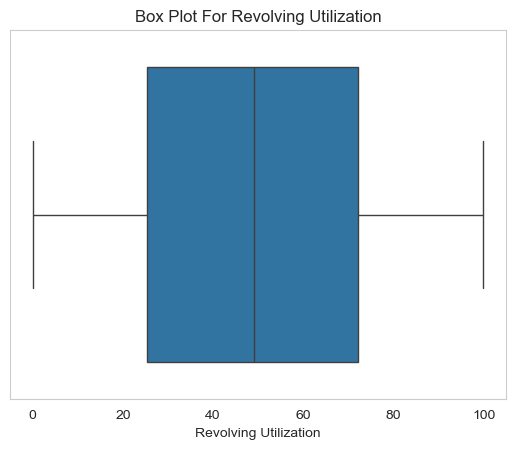

In [56]:
# Box plot for revol_util

sns.boxplot(x=lendingdata["revol_util"])
plt.title('Box Plot For Revolving Utilization')
plt.xlabel('Revolving Utilization')
plt.show()

##### There are no outliers for Revolving Utilisation, the values are within range

In [57]:
lendingdata.shape

(38191, 20)

# Univariate Analysis

In [58]:
sns.reset_defaults()

In [59]:
lendingdata['loan_status'].value_counts()

loan_status
Fully Paid     32607
Charged Off     5584
Name: count, dtype: int64

#### Plot: Loan Amount

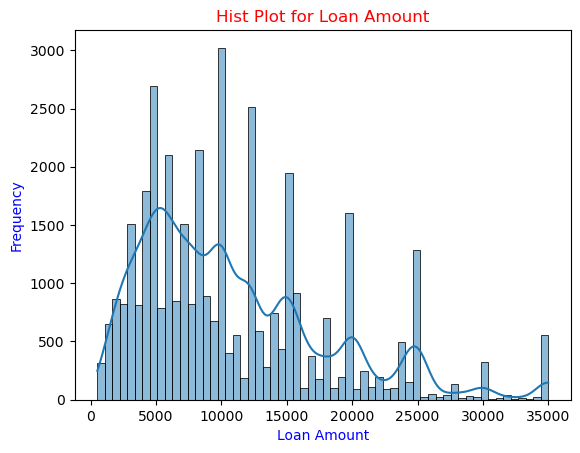

In [60]:
sns.histplot(lendingdata["loan_amnt"], kde=True)
plt.xlabel('Loan Amount', color='blue')
plt.ylabel('Frequency', color='blue')    # Changing the y-axis label color
plt.title('Hist Plot for Loan Amount', color='red')
plt.show()

1. The data distribution against loan amount, is rightly skewed,
  i.e there are more applicants who have taken less amount loans than high amount loans 
2. The mode of loan amount is more around 10000

#### Plot: Interest Rate

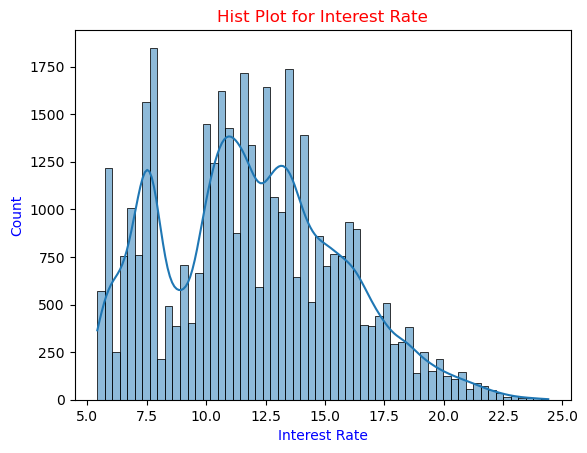

In [61]:
sns.histplot(lendingdata["int_rate"], kde=True)
plt.xlabel('Interest Rate', color='blue')
plt.ylabel('Count', color='blue')    # Changinbog the y-axis label color
plt.title('Hist Plot for Interest Rate', color='red')
plt.show()

1. The peak at 7.5 indicates more loans are issued at 7.5 interest rate. There is also second peak around 12 - 14, which 
   again indicates more loans are issued at this interest rate.
2. As the interest rate increases, the number of applicants taking loan at high interest rate is also decreasing. 

#### Plot: Annual Income

In [62]:
print(lendingdata['annual_inc'].describe())

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64


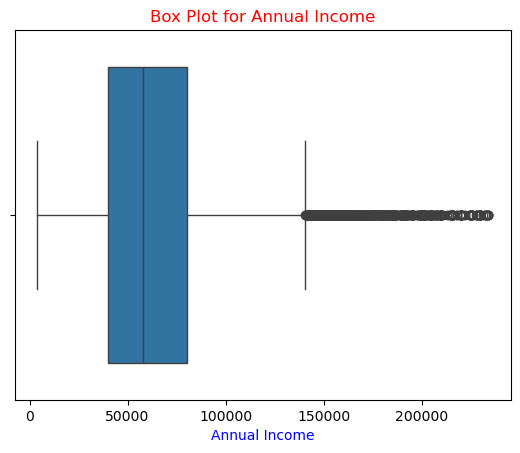

In [63]:
sns.boxplot(x = lendingdata["annual_inc"])
plt.xlabel('Annual Income', color='blue')
plt.title('Box Plot for Annual Income', color='red')
plt.show()

1. The box plot shows that the majority of annual incomes are concentrated between 40,000 and 80,000. Median is around 55,000.
2. The data has several high-amount of annual income outliers

#### Plot: Debt To Income (DTI)

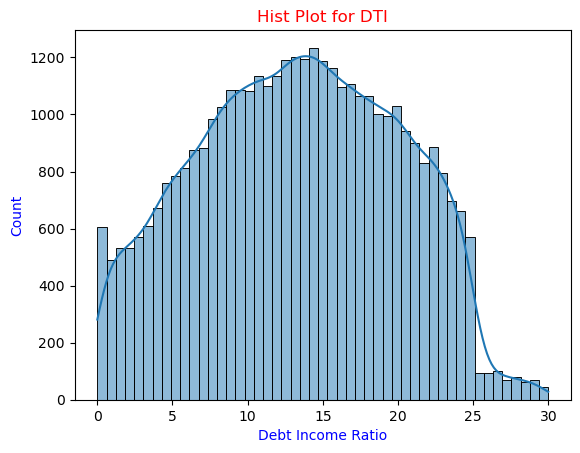

In [64]:
sns.histplot(lendingdata["dti"], kde=True)
plt.xlabel('Debt Income Ratio', color='blue')
plt.ylabel('Count', color='blue')    # Changinbog the y-axis label color
plt.title('Hist Plot for DTI', color='red')
plt.show()

1. The distribution of DTI ratio is symmetrical
2. The number of applicants increases as DTI increases, when DTI goes beyond 15 the number of applicants decreases
3. The histogram shows that most DTI values fall within the range of approximately 5 to 25, 
   with very few applicants having a DTI ratio below 5 or above 25.

#### Plot: Public Record Bankruptcies

In [65]:
sns.set_style("white")

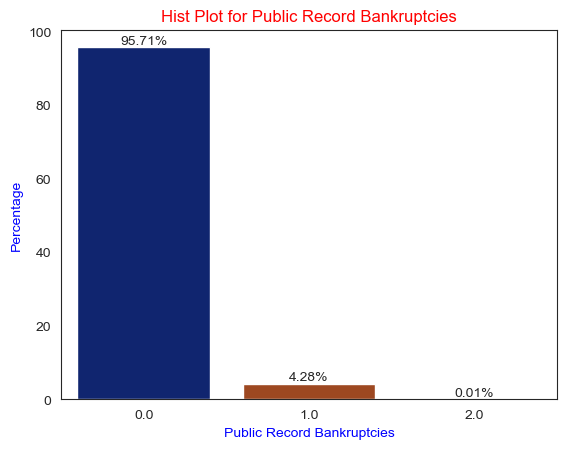

In [66]:
ax = sns.barplot(data=lendingdata["pub_rec_bankruptcies"].value_counts(normalize=True) * 100,palette='dark')
plt.xlabel('Public Record Bankruptcies', color='blue')
plt.ylabel('Percentage', color='blue')
plt.title('Hist Plot for Public Record Bankruptcies', color='red')

# Display the counts on each bar using bar_label
for container in ax.containers:
    ax.bar_label(container, labels=[f'{p.get_height():.2f}%' for p in container])

plt.show()

1. 96% of applicants do not have any history of public bankruptcies records 
2. Only 4% of applicants with public bankruptcies records exist in the dataset given

#### Plot: Revolving Line utilisation

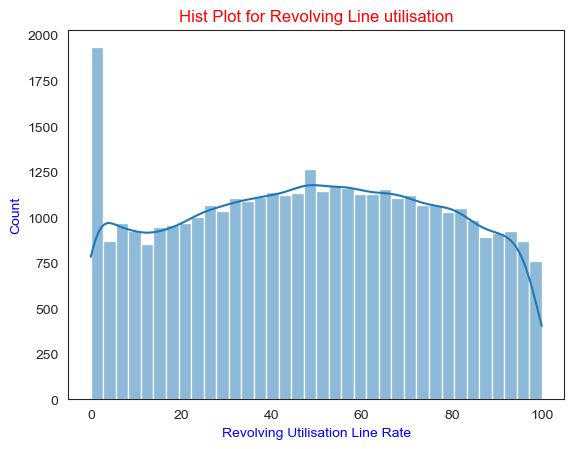

In [67]:

sns.histplot(lendingdata["revol_util"], kde=True)
plt.xlabel('Revolving Utilisation Line Rate', color='blue')
plt.ylabel('Count', color='blue')    # Changinbog the y-axis label color
plt.title('Hist Plot for Revolving Line utilisation', color='red')
plt.show()

1. The peak at 0 indicates that the most of the applicants are not using any of their available revolving credit. 
   which means they have no outstanding balances on their credit cards or revolving credit lines.
2. Between 40 - 60 , there is peak in utilisation rate which is also moderate 
3. The number of applicants with high utilization rates is slightly lower compared to those in the mid-range. 
   This might suggest that fewer individuals max out their credit balance posing a risk of getting 'default'

#### Plot: Term

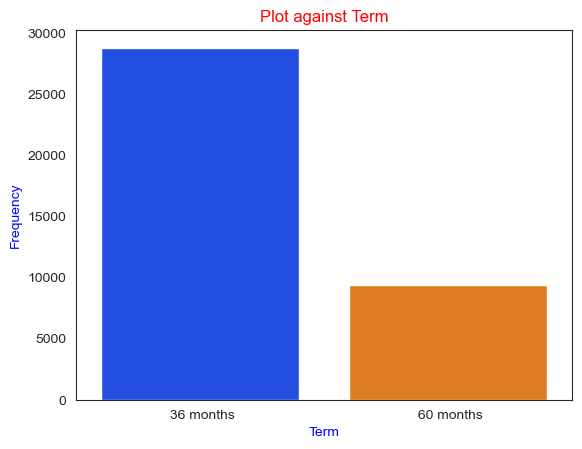

In [323]:

sns.countplot(x=lendingdata['term'],palette="bright")
plt.xlabel('Term', color='blue')
plt.ylabel('Frequency', color='blue')    # Changing the y-axis label color
plt.title('Plot against Term', color='red')
plt.show()

1. Majority of applicants have opted for 3 years loan term

#### Plot: loan status

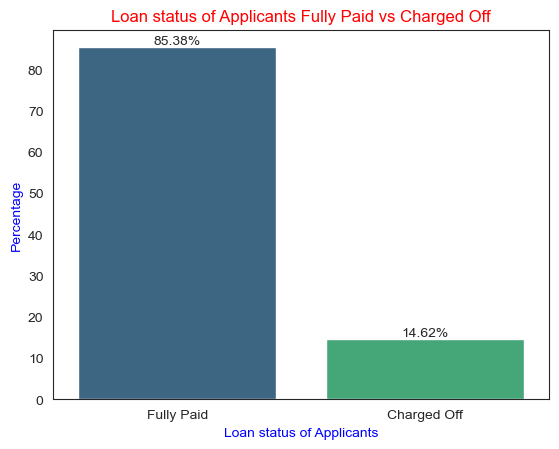

In [519]:
ax = sns.barplot(data=lendingdata["loan_status"].value_counts(normalize=True)*100,palette="viridis")
plt.xlabel('Loan status of Applicants', color='blue')
plt.ylabel('Percentage', color='blue')   
plt.title('Loan status of Applicants Fully Paid vs Charged Off', color='red')

# Display the counts on each bar using bar_label
for container in ax.containers:
    ax.bar_label(container,fmt="%.2f%%")

plt.show()

1. 85% of applicants repaid the loan
2. **15% of the population defaulted** and could not pay the loan

#### Plot: Grade

In [70]:
## Loan grade is a rating assigned by lenders, such as Lending Club (LC), to categorize loans based on their creditworthiness
## and associated risk. This grading system helps both lenders and borrowers understand the risk level of a loan. 
## Typically, loan grades range from A to G, with A being the highest grade (lowest risk) 
## and G being the lowest grade (highest risk). 
## Each grade can also have sub-grades (e.g., A1, A2, A3) for finer differentiation.

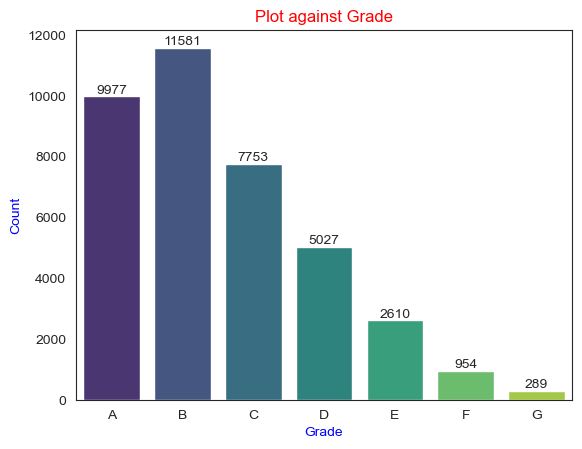

In [71]:
ax = sns.countplot(x=lendingdata['grade'].sort_values(),palette="viridis")

plt.xlabel('Grade', color='blue')
plt.ylabel('Count', color='blue')    # Changing the y-axis label color
plt.title('Plot against Grade', color='red')

# Display the counts on each bar using bar_label
for container in ax.containers:
    ax.bar_label(container)
plt.show()

1. **More number of applicants fall between A - C** , which indicates people with more creditworthiness 
   have been granted loans, maintaining lower to moderate risk.

#### Plot: Sub Grade

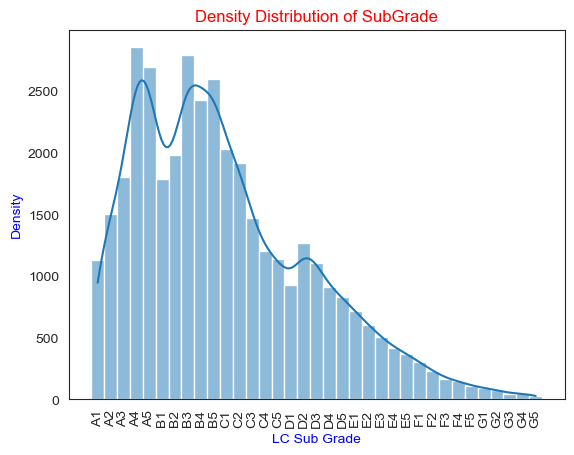

In [72]:
sns.set_style("white")
ax = sns.histplot(x=lendingdata['sub_grade'].sort_values(),kde=True)

plt.xlabel('LC Sub Grade', color='blue')
plt.ylabel('Density', color='blue')    # Changing the y-axis label color
plt.title('Density Distribution of SubGrade', color='red')

plt.xticks(rotation=90)
plt.show()


1. Here, there are peaks in the subgrades A4,A5,B3, B4 and B5. This suggests that a significant portion of loans fall 
   within these subgrades, indicating higher creditworthiness among a large number of applicants.
2. There is also gradual decline as we move from A1-G5. This suggests that loans are less granted in the lower subgrades.      

#### Plot: Employee Length

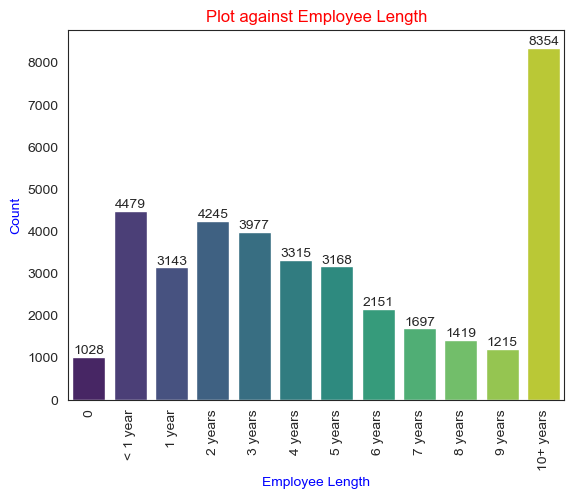

In [73]:
emp_length_order = [
    '0', '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
    '6 years', '7 years', '8 years', '9 years', '10+ years'
]

ax = sns.countplot(x=lendingdata['emp_length'].sort_values(),palette="viridis",order=emp_length_order)

plt.xlabel('Employee Length', color='blue')
plt.ylabel('Count', color='blue')    # Changing the y-axis label color
plt.title('Plot against Employee Length', color='red')
plt.xticks(rotation=90)

# Display the counts on each bar using bar_label
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1. There is a **peak at 10+ years** which indicates - Number of Applicants taking loans with higher employmnet length is high.
   A **stable income job draws more applicants in taking the Loan**, as they would better manage the finance and repay the loan

#### Plot: Home Ownership

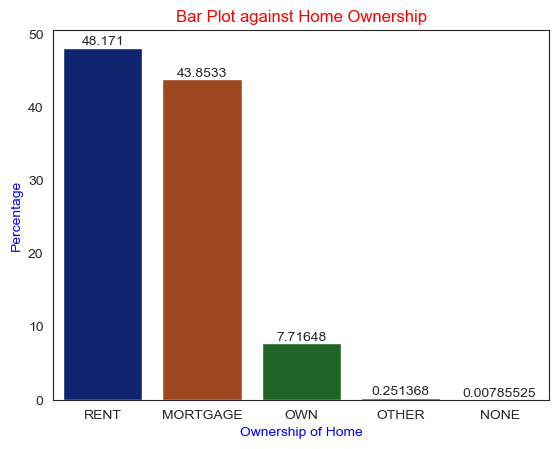

In [548]:
ax = sns.barplot(data=lendingdata["home_ownership"].value_counts(normalize=True)*100,palette='dark')
plt.xlabel('Ownership of Home', color='blue')
plt.ylabel('Percentage', color='blue')   
plt.title('Bar Plot against Home Ownership', color='red')

# Display the counts on each bar using bar_label
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1.  Overall, Renters and Mortgage holders make up the majority of applicants.

#### Plot: Verification status

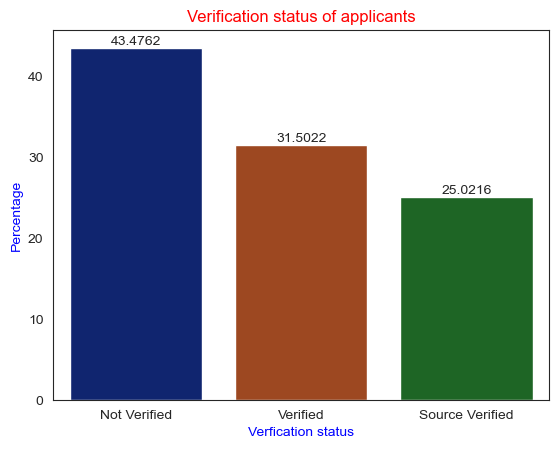

In [549]:
ax = sns.barplot(data=lendingdata["verification_status"].value_counts(normalize=True)*100,palette='dark')
plt.xlabel('Verfication status', color='blue')
plt.ylabel('Percentage', color='blue')   
plt.title('Verification status of applicants', color='red')

# Display the counts on each bar using bar_label
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1. There are more applicants whose income source is Not Verified, which can pose a risk 

#### Plot: Purpose

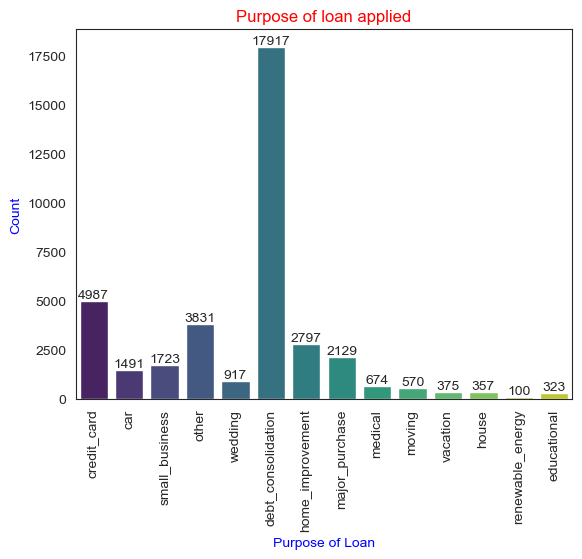

In [552]:
ax = sns.countplot(x=lendingdata['purpose'],palette="viridis")

plt.xlabel('Purpose of Loan', color='blue')
plt.ylabel('Count', color='blue')   
plt.title('Purpose of loan applied', color='red')
plt.xticks(rotation=90)

# Display the counts on each bar using bar_label
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1. The plot indicates, people who have taken loan for **Debt consolidation is high** followed by loan for **debt on credit card**. This highlights a focus on debt management among borrowers.

#### Plot: Address State

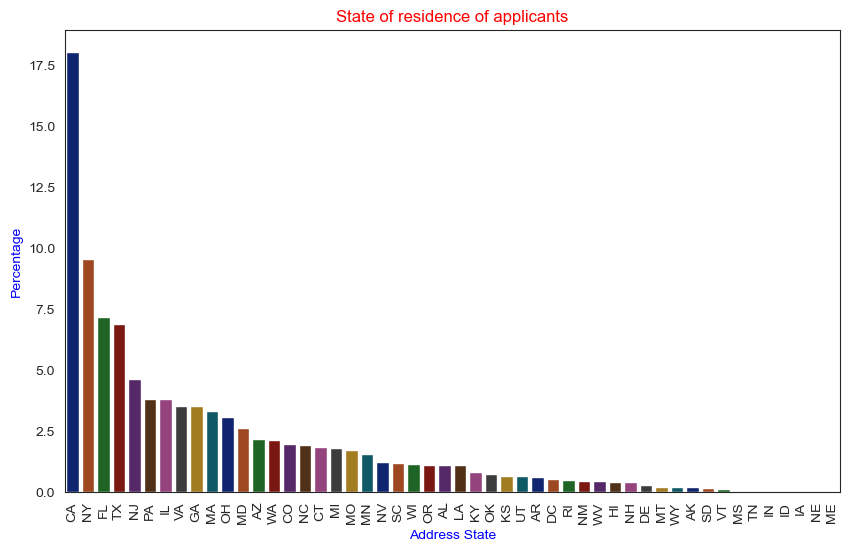

In [554]:
plt.figure(figsize=[10,6])

#ax = sns.countplot(x=lendingdata['addr_state'],palette="viridis")
ax = sns.barplot(data=lendingdata["addr_state"].value_counts(normalize=True)*100,palette='dark')

plt.xlabel('Address State', color='blue')
plt.ylabel('Percentage', color='blue')   
plt.title('State of residence of applicants', color='red')
plt.xticks(rotation=90)

plt.show()

1. The plot shows that larger population residing in **California CA, New York NY, Florida FL,Texas TX, New Jersey NJ**
   have taken loans which means among urban population these are the cities from which applicants have  opted for more loans.

#### Plot: Issue Year

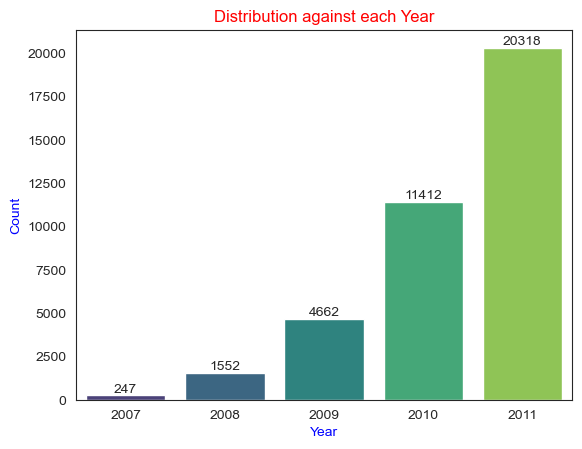

In [78]:
ax = sns.countplot(x=lendingdata['issue_year'],palette="viridis")

plt.xlabel('Year', color='blue')
plt.ylabel('Count', color='blue')   
plt.title('Distribution against each Year', color='red')


# Display the counts on each bar using bar_label
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1. Large number of applicants have taken loans in **Year 2011**, economic crisis could be the reason

#### Plot: Issue Month

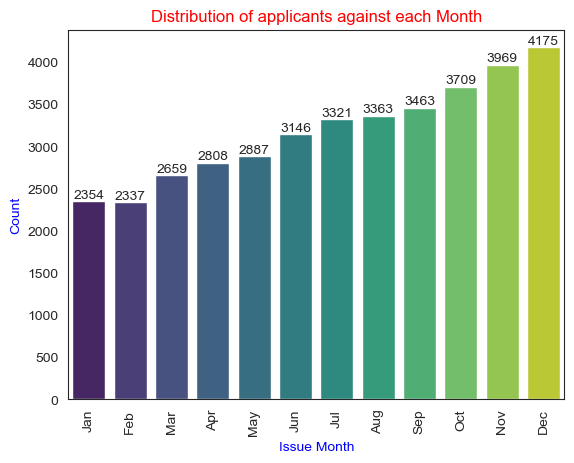

In [79]:
issue_month_order = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
    'Aug', 'Sep', 'Oct', 'Nov', 'Dec' ]


ax = sns.countplot(x=lendingdata['issue_month'].sort_values(),palette="viridis",order=issue_month_order)

plt.xlabel('Issue Month', color='blue')
plt.ylabel('Count', color='blue')   
plt.title('Distribution of applicants against each Month', color='red')
plt.xticks(rotation=90)

# Display the counts on each bar using bar_label
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1. The ratio of applicants taking loan has been increasing over months and **December** saw the highest peak. 
   The peak at Dec could be due to Holiday Season in US 

## Segmented Univariate Analysis

### Segmented Univariate Analysis For Numerical Variables

In [80]:
def boxplot(x,y,x_title):
     sns.boxplot(x=x, y=y, data=lendingdata,palette="bright")
     plt.xlabel(x_title, color='blue')
     plt.ylabel('Loan Status', color='blue')
     plt.title(f'Distribution of {x_title} by Loan Status', color='red')
     plt.show()
      

#### Plot: Annual Income By Loan Status

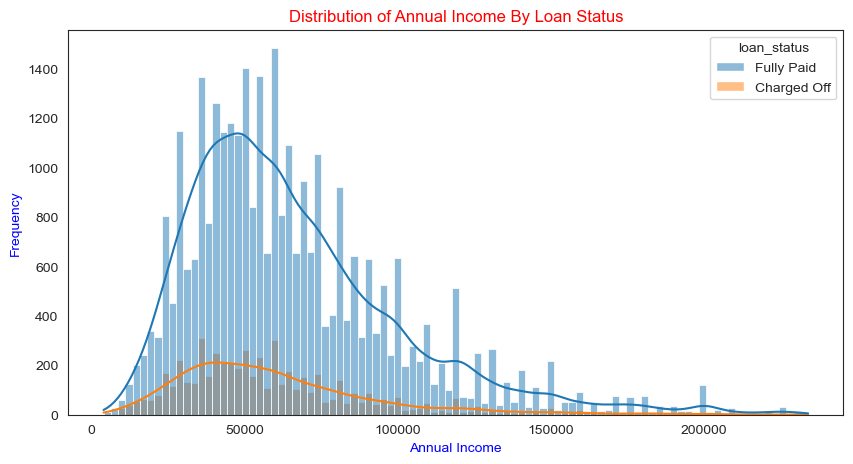

In [556]:
plt.figure(figsize=(10,5))
sns.histplot(data=lendingdata,x='annual_inc',hue='loan_status',kde=True)
plt.xlabel('Annual Income',color='blue')
plt.ylabel('Frequency',color='blue')
plt.title('Distribution of Annual Income By Loan Status',fontsize=12,color='red')
plt.show()

1. The distribution of annual income is right-skewed for both "Fully Paid" and "Charged Off" loan statuses, 
   indicating that most applicants have lower to moderate incomes, Very few applicants having high incomes.
    
2. **Applicants with lower annual incomes are more likely to have "Charged Off" loans**, 
   Higher annual incomes are more strongly associated with "Fully Paid" loans, and are more likely to repay their loans fully.

#### Interest Rate By Loan Status

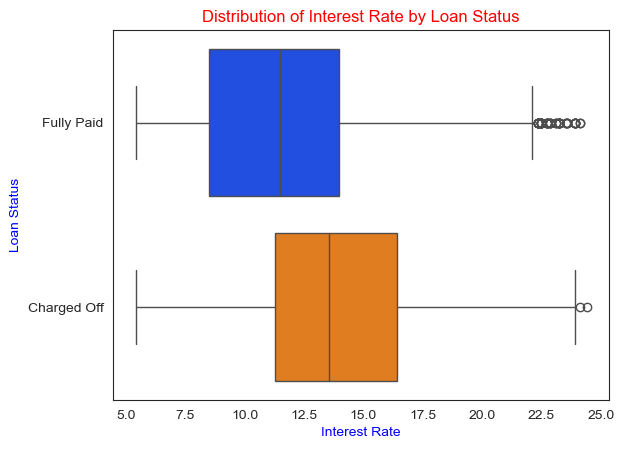

In [82]:
boxplot(lendingdata["int_rate"],lendingdata['loan_status'],'Interest Rate')

1. The median of interest rate is high for "charged-off" as compared to "Fully Paid", 
2. The distribution of interest rate for "charged off" is broader when compared to "Fully Paid" Loans
3. Applicants with High Interest Rate have higher risk/probablity of getting "Charged Off".


####  DTI  By Loan Status

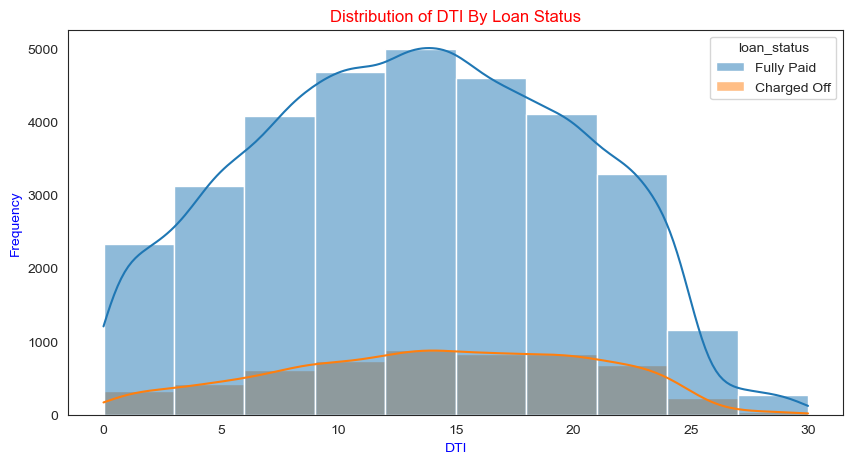

In [555]:
plt.figure(figsize=(10,5))
sns.histplot(data=lendingdata,x='dti',hue='loan_status',bins=10,kde=True)
plt.xlabel('DTI',color='blue')
plt.ylabel('Frequency',color='blue')
plt.title('Distribution of DTI By Loan Status',fontsize=12,color='red')
plt.show()

1. The proportion of charged off is consistent as the curve is flat
2. For Fully paid we see a normal distribution  
   

#### Loan Amount By Loan Status

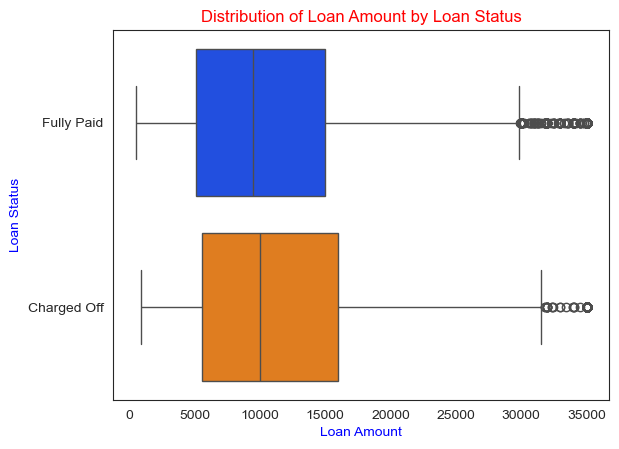

In [84]:
boxplot(lendingdata["loan_amnt"],lendingdata['loan_status'],'Loan Amount')

The distribution of loan amounts is **relatively similar for both "Fully Paid" and "Charged Off" loans**
  Except for "Charged off" the amount upperbound, 75th percentile and median are slightly high compared to "Full Paid"

### Segmenting the Continuous Data into Groups 

##### Segment on Interest Rate

In [85]:
loandata = lendingdata.copy()
labels = [ '5-9', '9-13', '13-17', '17-21', '21-25']
loandata['int_rate_group'] = pd.cut(loandata['int_rate'], bins=5,precision =0,labels=labels)

# normalize=True - gives the proportion or %
# unstack() converts this multi-index Series into a DataFrame where each unique value of the counted variable becomes a column.
# fillna(0) replaces any NaN values with 0. This is necessary because some groups may not have all possible categories, resulting in NaN values in the DataFrame. 
# By replacing NaN with 0, we ensure that these missing categories are treated as having zero

intrest_rate_loan_status = loandata.groupby('int_rate_group')['loan_status'].value_counts(normalize=True).unstack().fillna(0)

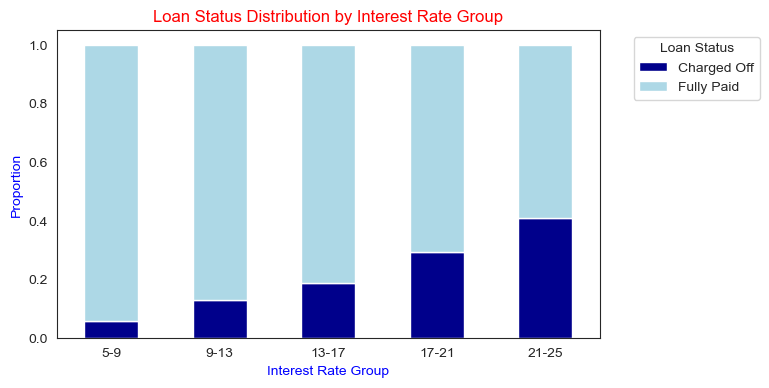

In [532]:
ax = intrest_rate_loan_status.plot(kind='bar', stacked=True, figsize=(7, 4), color=['darkblue', 'lightblue']) 
plt.title('Loan Status Distribution by Interest Rate Group',color='Red')
plt.xlabel('Interest Rate Group',color='blue')
plt.ylabel('Proportion',color='blue')
plt.xticks(rotation=360)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
    

1.As the interest rate increases, the proportion of "Charged Off" loans increases significantly. 
  Where as, the proportion of "Fully Paid" loans decreases as the interest rate increases.
  
2.In the higher interest rate groups (17-21% and 21-25%), the applicants for "Charged Off" loans increases dramatically
  which indicates that higher the interest rate more the probablity of loan default.

##### Segment on Annual Income

In [87]:
loandata = lendingdata.copy()

labels =['3k-20k','20k-31k','31k-40k','40k-50k','50k-59k','59k-78k','78k-90k','90k-105k','105k-120k','120k-140k']
loandata['annual_inc_catg'] = pd.cut(loandata['annual_inc'], bins=10,precision =0,labels=labels)

annual_inc_loan_status = loandata.groupby('annual_inc_catg')['loan_status'].value_counts(normalize=True).unstack().fillna(0)

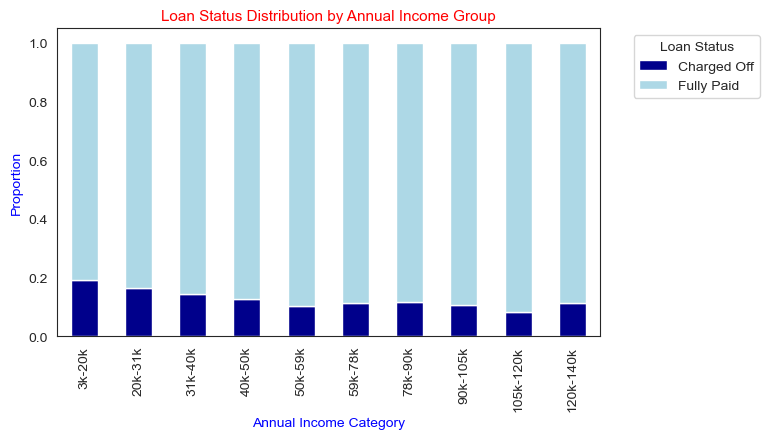

In [582]:
ax = annual_inc_loan_status.plot(kind='bar', stacked=True, figsize=(7, 4), color=['darkblue', 'lightblue']) 
plt.title('Loan Status Distribution by Annual Income Group',color='Red',fontsize=11)
plt.xlabel('Annual Income Category',color='blue')
plt.ylabel('Proportion',color='blue')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

1. The proportion of **Charged Off loans is higher in the lower income groups** (e.g., 3k-20k and 20k-31k).
   As income increases, the proportion of Charged Off loans generally decreases,indicating a lower risk of default.

##### Segment on Loan Amount

In [89]:
loandata = lendingdata.copy()
loandata['loan_amount_segment'] = pd.cut(lendingdata['loan_amnt'], 
                                            bins=[0, 5000, 15000, 25000, lendingdata['loan_amnt'].max()], 
                                            labels=['Low', 'Medium', 'High', 'Very High'])
print(loandata['loan_amount_segment'].value_counts())

# Crosstab for loan status and loan amount segment
loan_status_crosstab = pd.crosstab(loandata['loan_amount_segment'], loandata['loan_status'])

# Normalize to see the percentage distribution
loan_status_crosstab_normalized = loan_status_crosstab.div(loan_status_crosstab.sum(axis=1), axis=0)
loan_status_crosstab_normalized

loan_amount_segment
Medium       20367
Low           9436
High          7045
Very High     1343
Name: count, dtype: int64


loan_status,Charged Off,Fully Paid
loan_amount_segment,,
Low,0.138830,0.861170
Medium,0.131929,0.868071
High,0.180696,0.819304
Very High,0.233805,0.766195


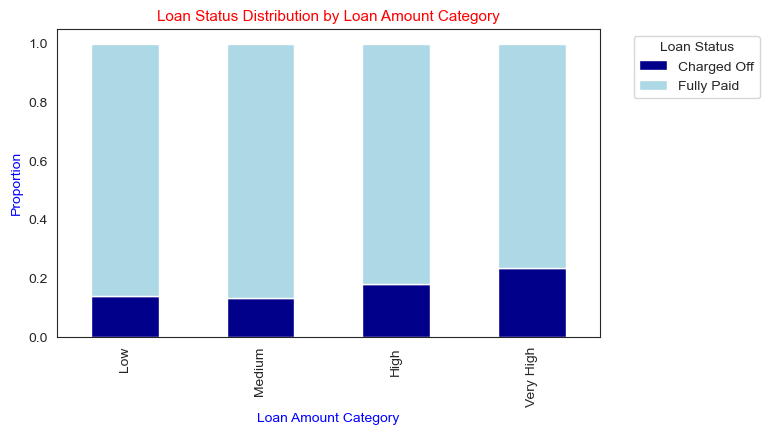

In [90]:
ax = loan_status_crosstab_normalized.plot(kind='bar', stacked=True, figsize=(7, 4), color=['darkblue', 'lightblue']) 
plt.title('Loan Status Distribution by Loan Amount Category',color='Red',fontsize=11)
plt.xlabel('Loan Amount Category',color='blue')
plt.ylabel('Proportion',color='blue')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

1. For Very High loan amounts the charged off are more and increasing at slow rate

### Segmented Univariate Analysis For Categorical Variables

In [324]:
## Function to calculate the percentages between two columns

def calc_perc(df2, col1, col2) :
    perc = df2.groupby([col1, col2])[col2].value_counts().reset_index()
    total_sum = perc.groupby([col2])['count'].transform('sum')
    perc['percentage'] = (perc['count']/total_sum) *100
    return perc

In [91]:
## Function to create a count plot

def countplot(x,y,x_title):
    ax=sns.countplot(data=lendingdata,x=x,hue=y)
    plt.xlabel(x_title,color='blue')
    plt.ylabel('Count',color='blue')
    plt.title(f'Distribution of {x_title} By Loan Status',fontsize=10, color='Red')
    plt.show()


#### Plot: Term By LoanStatus

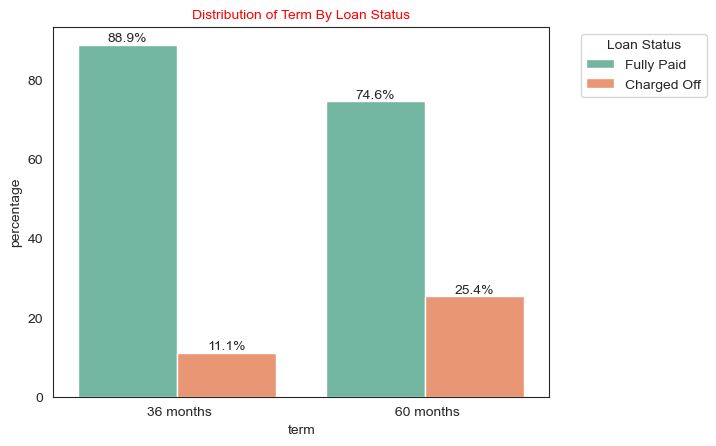

In [371]:
term_perc = calc_perc(lendingdata, 'loan_status', 'term')
term_plot = sns.barplot(data=term_perc, x='term', y='percentage', hue='loan_status',  hue_order=('Fully Paid', 'Charged Off'), palette='Set2')
for p in term_plot.containers:
    term_plot.bar_label(p, fmt='%.1f%%', label_type='edge')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f'Distribution of Term By Loan Status',fontsize=10, color='Red')
plt.show()

1. Among Charged Off Loans, the number of defaults is higher for 60-month term loans compared to 36-month term loans.
2. For Fully Paid loans, people who have taken 36-month term are likely to repay earlier than 60 month term loan

#### Plot: Grade By LoanStatus

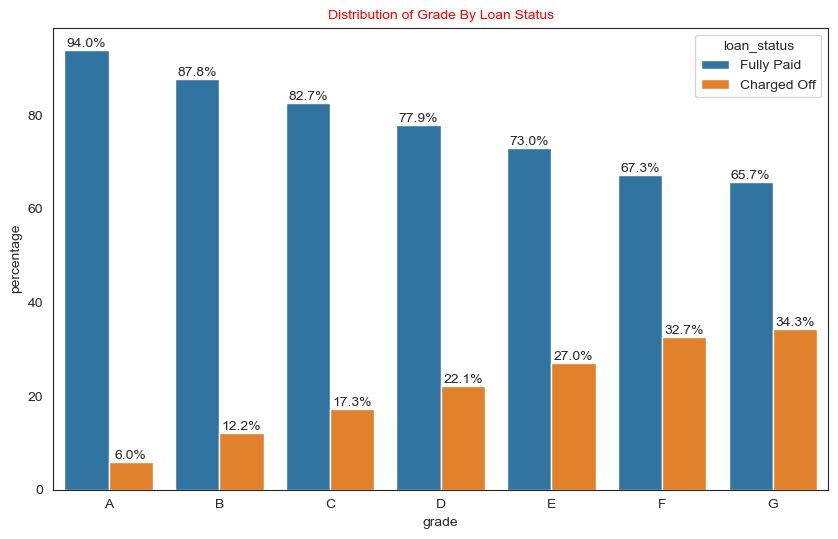

In [372]:
plt.figure(figsize=(10,6))
grade_perc = calc_perc(lendingdata, 'loan_status', 'grade')
p1 = sns.barplot(data=grade_perc, x='grade', y='percentage', hue='loan_status', hue_order=('Fully Paid', 'Charged Off'))

for p in p1.containers:
    p1.bar_label(p, fmt='%.1f%%', label_type='edge')
plt.title(f'Distribution of Grade By Loan Status',fontsize=10, color='Red')
plt.show()

1. Higher-grade loans (A, B) are more likely to be fully paid, whereas lower-grade loans (D, E, F, G)
   have a higher probability of default.
2. As grade decreases the chances to get "ChargedOff" increases

#### Plot: EmpLength By LoanStatus

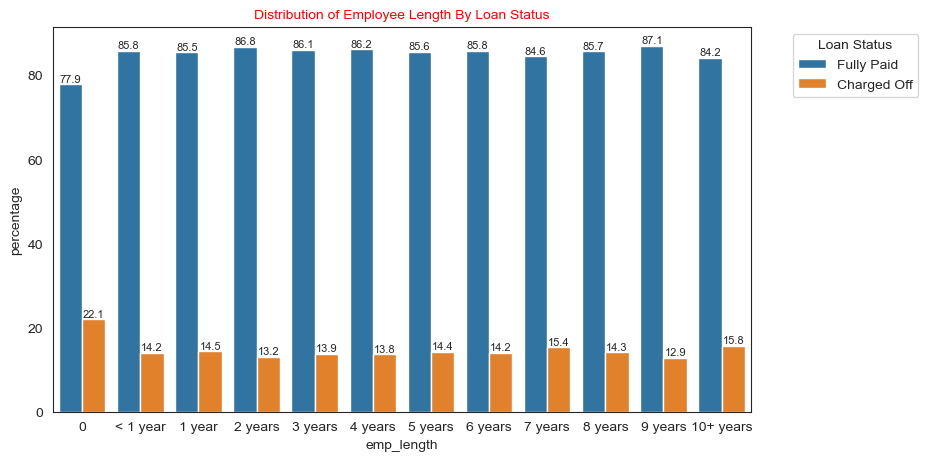

In [373]:
emp_length_order = [
    '0', '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
    '6 years', '7 years', '8 years', '9 years', '10+ years'
]

plt.figure(figsize=(9,5))
emp_length_perc = calc_perc(lendingdata, 'loan_status', 'emp_length')
p1 = sns.barplot(data=emp_length_perc, x='emp_length', y='percentage', hue='loan_status',order=emp_length_order, hue_order=('Fully Paid', 'Charged Off'))
for p in p1.containers:
    p1.bar_label(p, fmt='%.1f', label_type='edge',fontsize=8)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f'Distribution of Employee Length By Loan Status',fontsize=10, color='Red')
plt.show()

The highest number of "Fully Paid" loans is observed in this category, indicating that applicants with long term employment are religious in repaying their loans.
However, there is also a noticeable number of defaults, which can be due to larger volume of loans in this category.

#### Plot: Home Ownership By LoanStatus

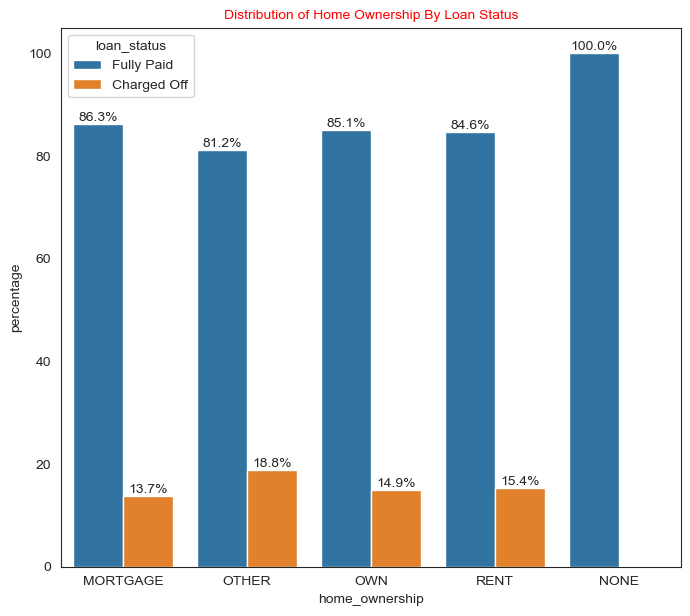

In [374]:
plt.figure(figsize=(8,7))
home_perc = calc_perc(lendingdata, 'loan_status', 'home_ownership')
h_plot = sns.barplot(data=home_perc, x='home_ownership', y='percentage', hue='loan_status', hue_order=('Fully Paid', 'Charged Off'))
for p in h_plot.containers:
    h_plot.bar_label(p, fmt='%.1f%%', label_type='edge')
plt.title(f'Distribution of Home Ownership By Loan Status',fontsize=10, color='Red')
plt.show()

**Summary**
1. The overall trend indicates that the majority of loans across all categories are fully paid.
2. Home ownership status as (MORTGAGE, OWN) and renting (RENT) have high fully paid percentages
3. The 'OTHER' category has a slightly higher charged off percentage, which may need further investigation 
4. The 'NONE' category might be an outlier 


#### Plot: Purpose By LoanStatus

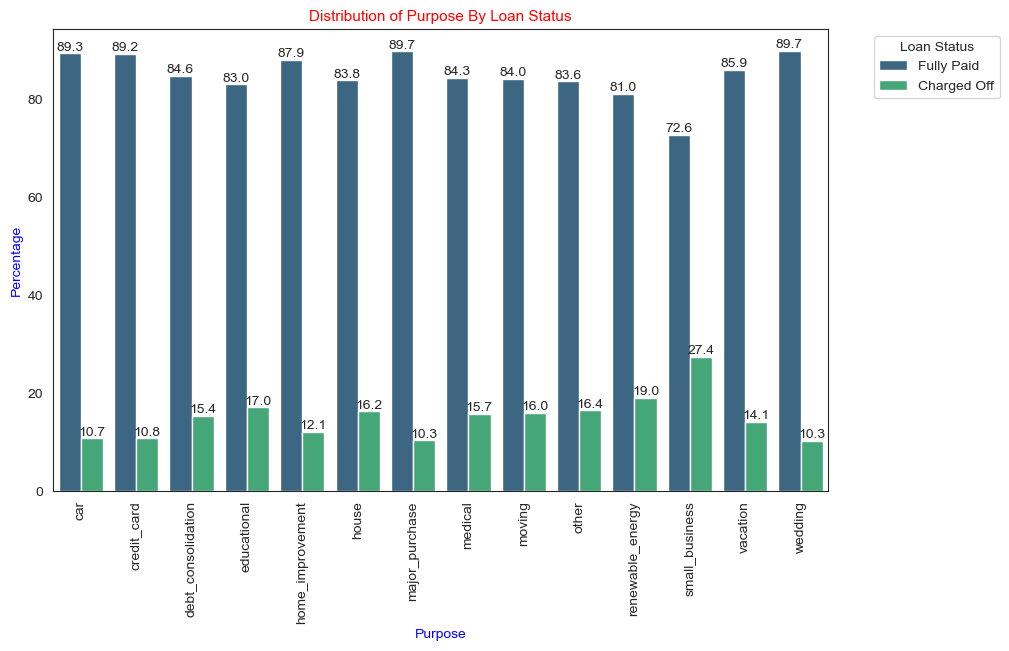

In [545]:
plt.figure(figsize=(10,6))
purpose_perc = calc_perc(lendingdata, 'loan_status', 'purpose')
p1 = sns.barplot(data=purpose_perc, x='purpose', y='percentage', hue='loan_status',palette="viridis", hue_order=('Fully Paid', 'Charged Off'))
plt.xlabel('Purpose',color="blue")
plt.ylabel('Percentage',color="blue")
plt.title('Distribution of Purpose By Loan Status',fontsize=11,color="red")
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
for p in p1.containers:
    p1.bar_label(p, fmt='%.1f', label_type='edge')
plt.show()

The "small_business" has a noticeable number of charged off loans, indicating, applicants may take out substantial loans and often fail to repay them.


#### Plot: Issue Years By LoanStatus

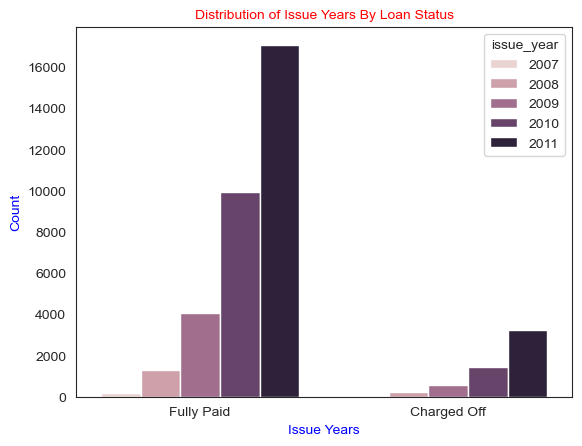

In [97]:
countplot('loan_status', 'issue_year', 'Issue Years')

As volume of Loans has increased over the years and peaked in 2011 due to some economic conditions.
Consequently, the number of both fully paid loan applicants and charged-off applicants also increased.

## Bi-Variate Analysis/Multi-Variate Analysis

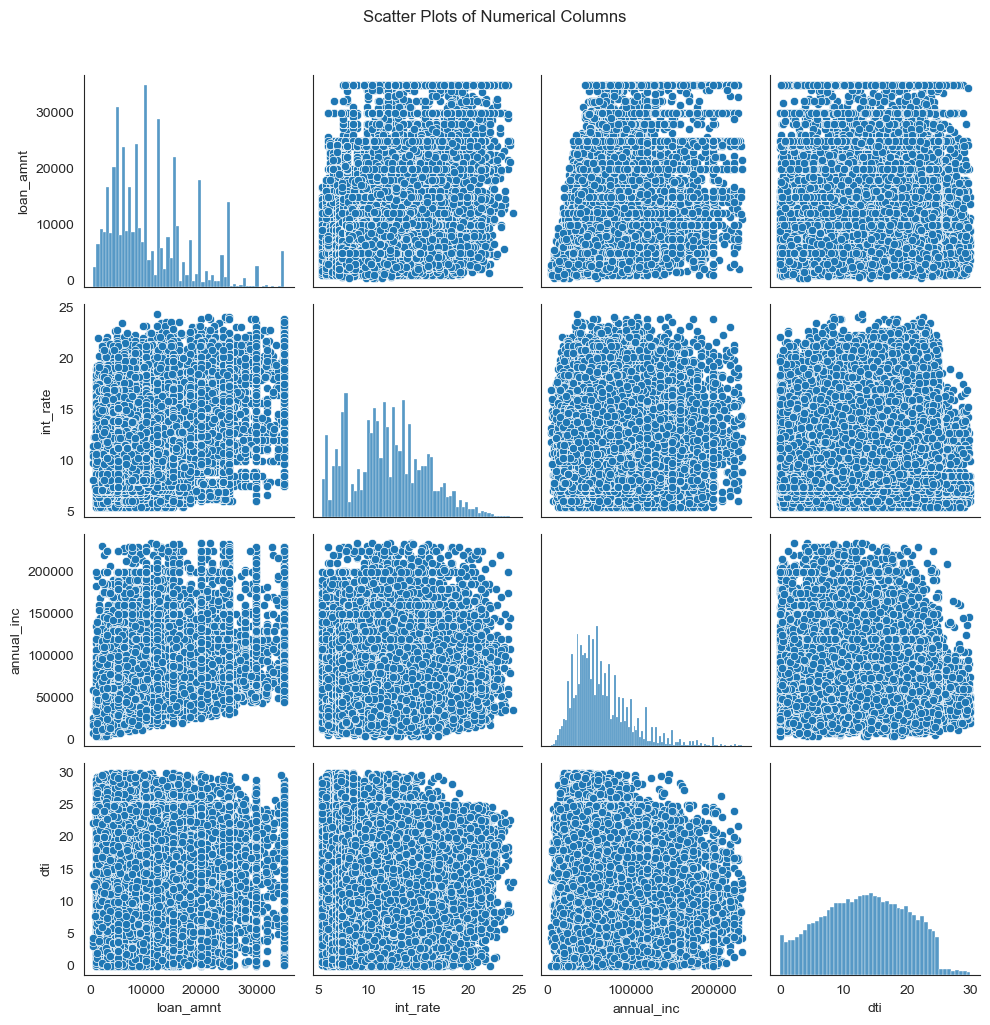

In [98]:
# pair plot 

sns.pairplot(lendingdata[['loan_amnt', 'int_rate', 'annual_inc', 'dti']])
plt.suptitle('Scatter Plots of Numerical Columns', y=1.02)
plt.tight_layout()
plt.show()

There are no strong linear relationships between most pairs of variables

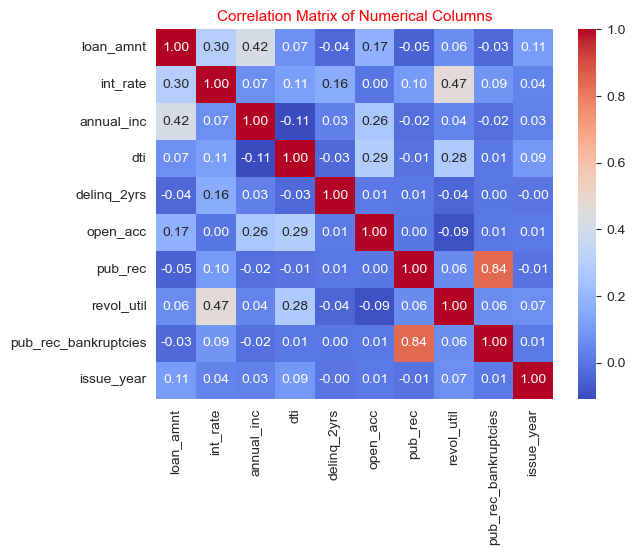

In [563]:
# heat map to derive any coorelation variables

correlation_matrix = lendingdata.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns', color ='red', fontsize=11)
plt.show()

From the above figure we can say pub_rec is more correlated

### Numerical vs Categorical

In [101]:
defaulters = lendingdata[lendingdata['loan_status'] == 'Charged Off']
defaulters.shape

(5584, 20)

In [102]:
non_defaulters = lendingdata[lendingdata['loan_status'] == 'Fully Paid']
non_defaulters.shape

(32607, 20)

#### InterestRate vs Grade

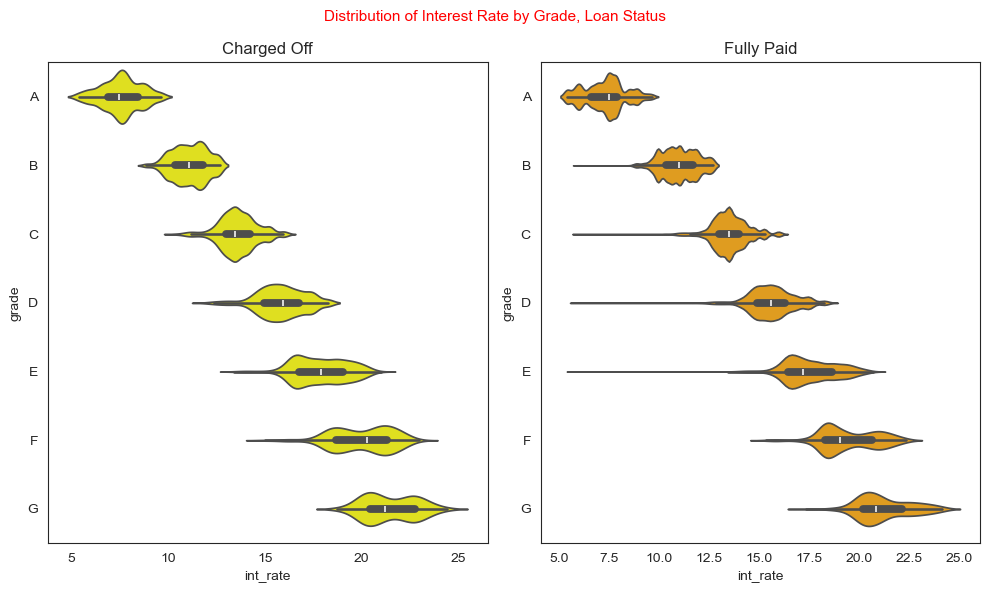

In [562]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.violinplot(ax=axes[0],x=defaulters["int_rate"],y=defaulters["grade"],color="yellow")
axes[0].set_title("Charged Off")
sns.violinplot(ax=axes[1],x=non_defaulters["int_rate"],y=non_defaulters["grade"],color="orange")
axes[1].set_title("Fully Paid")

fig.suptitle('Distribution of Interest Rate by Grade, Loan Status', fontsize=11, color='red')

plt.tight_layout()
plt.show()

1. The interest rates increase with each grade.
2. Low grades/ Low Creditworthiness (F and G) are associated with higher interest rates.
3. Interest rates seems to be higher for low grades, as lenders charge higher interest rates for riskier loans.

#### Annual Income vs Grade

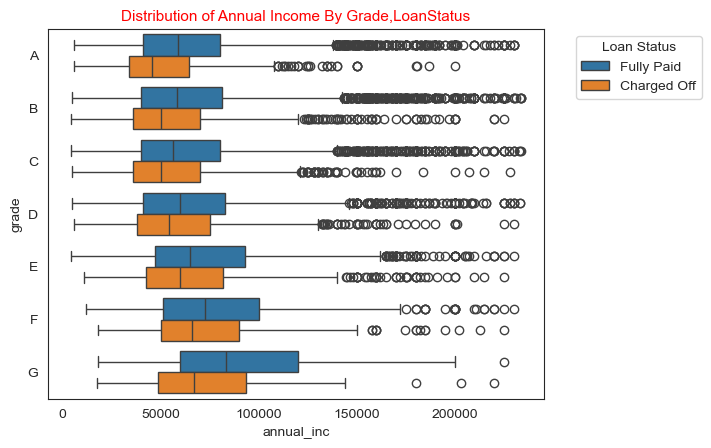

In [565]:
#sns.boxplot(x=defaulters_data["annual_inc"],y=defaulters_data["grade"])
#plt.show()

sns.boxplot(data=lendingdata, x="annual_inc",y="grade", hue='loan_status')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Annual Income By Grade,LoanStatus', fontsize=11, color='red')

plt.show()

1. Low Grades [E-G], Low income is assosicated with high risk of Defaulting
2. For Fully Paid, as the Grade descreased and income increased, we see more more volume of loans getting paid. 

#### Revolving Utilisation vs Grade

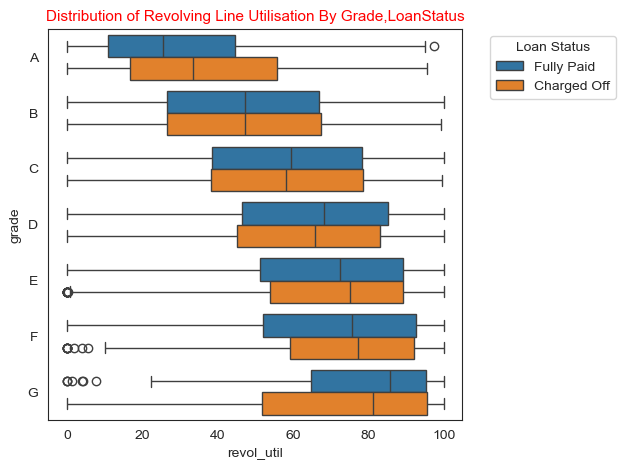

In [566]:
sns.boxplot(data=lendingdata, x="revol_util",y="grade", hue='loan_status')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Revolving Line Utilisation By Grade,LoanStatus', fontsize=11, color='red')

plt.tight_layout()
plt.show()

Revolving utilization is similar across each grades for both defaulters and non-defaulters.
There is no significant difference in the revolving utilization between defaulters and non-defaulters within each grade.


#### Loan Amount vs Grade

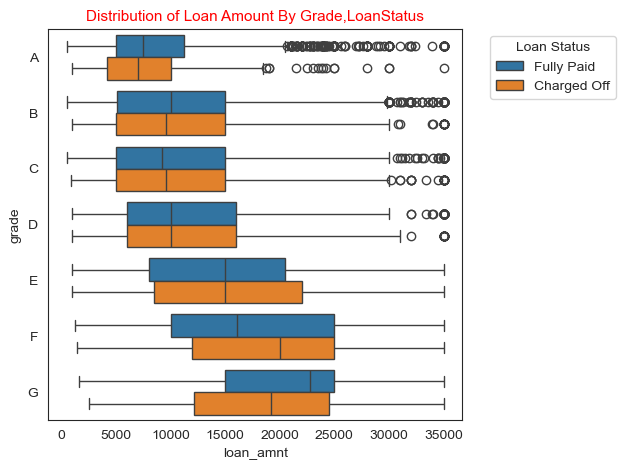

In [567]:
sns.boxplot(data=lendingdata, x="loan_amnt",y="grade", hue='loan_status')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.title('Distribution of Loan Amount By Grade,LoanStatus', fontsize=11, color='red')

plt.tight_layout()
plt.show()

#### Interest Rate vs Term and Loan Amount vs Term

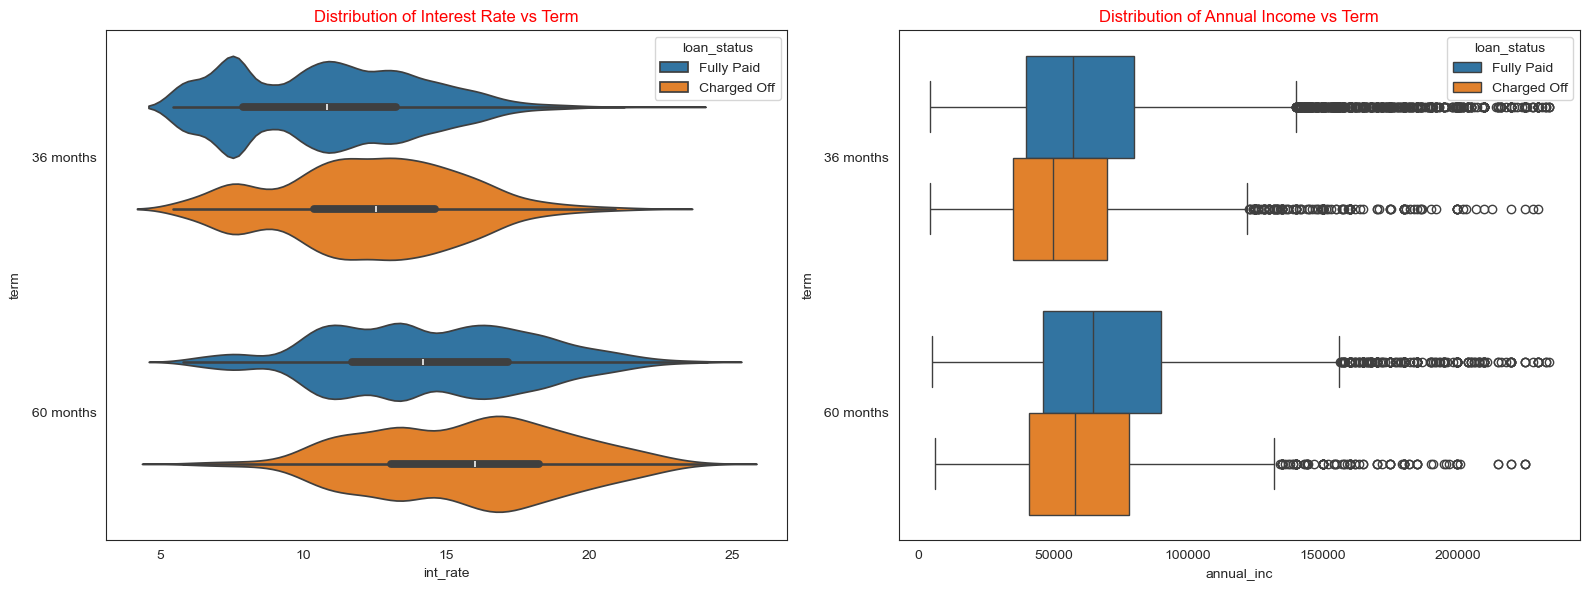

In [568]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.violinplot(ax=axes[0],data=lendingdata, x="int_rate",y="term",hue='loan_status')
axes[0].set_title("Distribution of Interest Rate vs Term", color = 'red')
sns.boxplot(ax=axes[1],data=lendingdata, x="annual_inc",y="term",hue='loan_status')
axes[1].set_title("Distribution of Annual Income vs Term", color = 'red')
plt.tight_layout()
plt.show()

1. **InterestRate vs Term**
   Higher interest rates are associated with a higher proportion of charged-off loans. 
   The impact of Term on Interest Rate for Fully Paid and charged off is similar.
2. **Annual Income vs Term**
   Lower the Annual Income higher the chance to get Charged Off
   


#### Loan Amount vs Emp Length , Interest Rate vs Emp Length

In [182]:
emp_length_order = [
    '0', '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
    '6 years', '7 years', '8 years', '9 years', '10+ years'
]

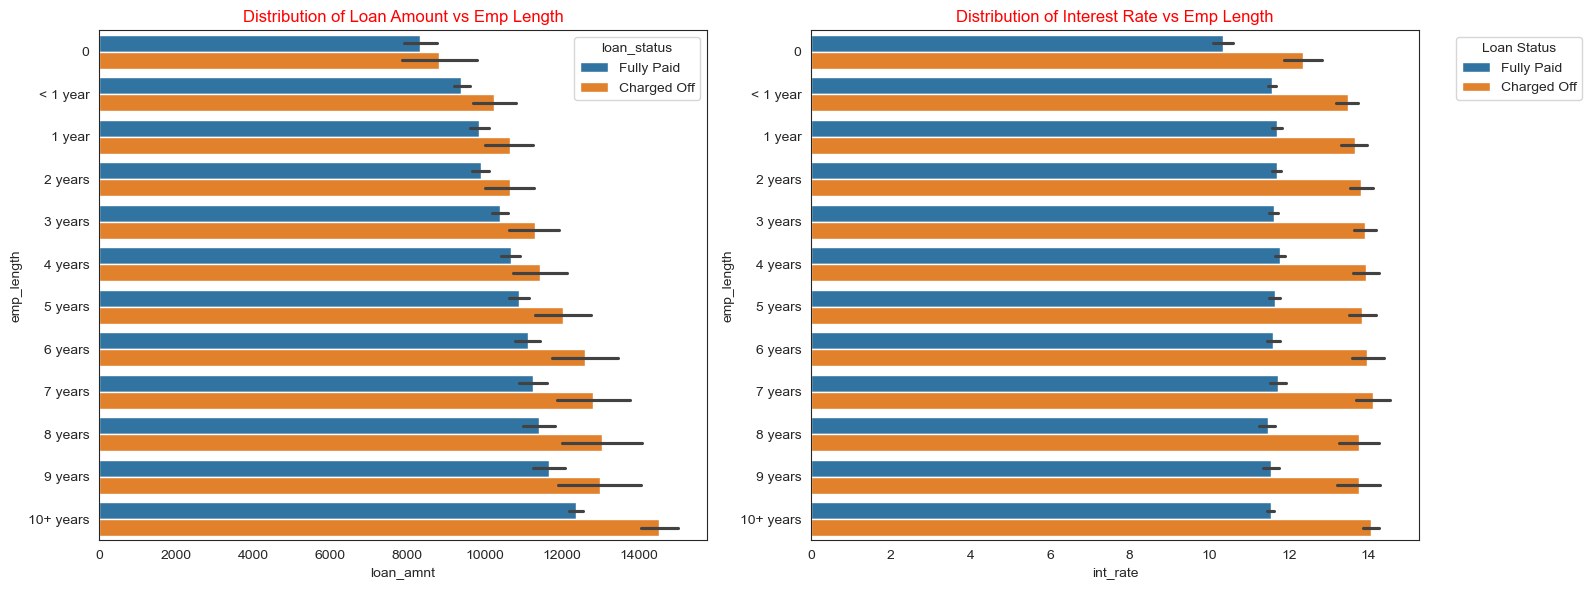

In [569]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(ax=axes[0],data=lendingdata, x="loan_amnt",y="emp_length",hue='loan_status',order=emp_length_order)
axes[0].set_title("Distribution of Loan Amount vs Emp Length", color='red')
sns.barplot(ax=axes[1],data=lendingdata, x="int_rate",y="emp_length",hue='loan_status',order=emp_length_order)
axes[1].set_title("Distribution of Interest Rate vs Emp Length", color='red')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

1. **Employment Length and Loan Amount:** 
 Applicants with longer employment lengths tend to have higher loan amounts.
2. **Employment Length and Interest Rates:** 
    Applicants with shorter employment lengths are having higher interest rates, 
    and "Charged Off" loans generally have higher interest rates than "Fully Paid" loans.


#### Interest Rate vs Home Ownership , Loan Amount vs Home Ownership

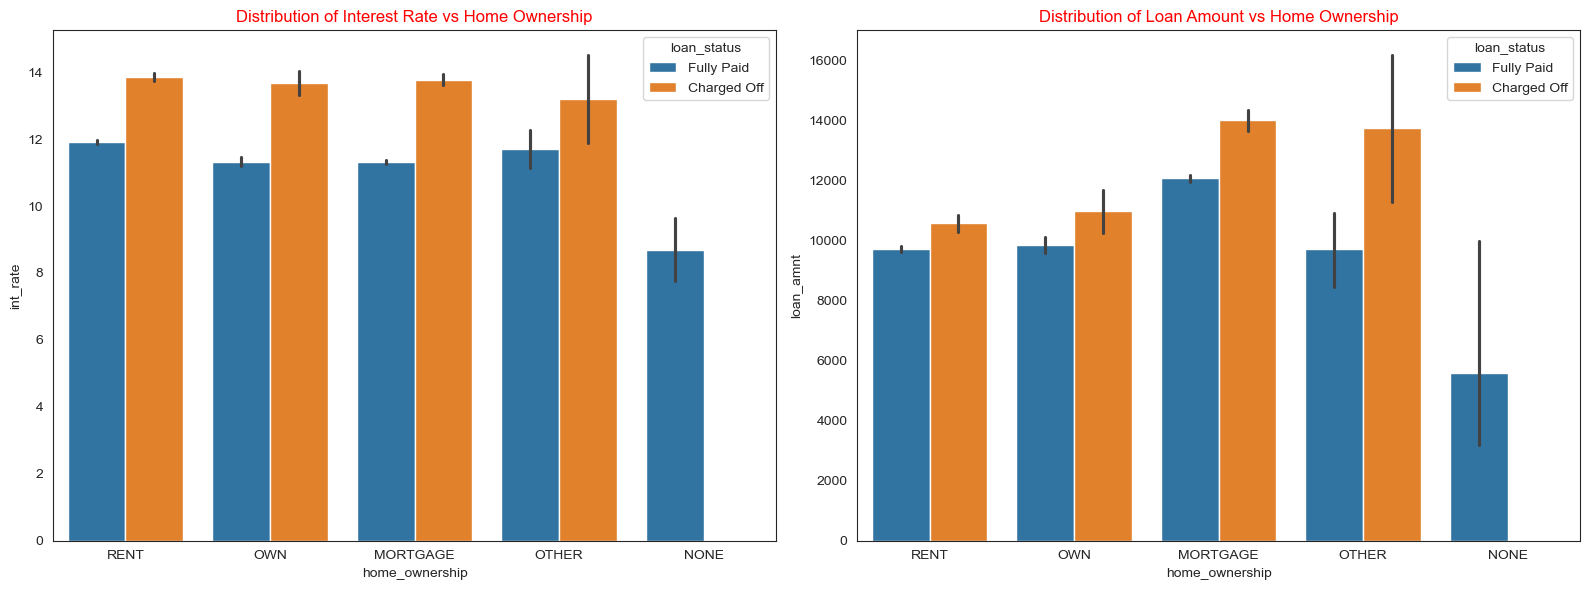

In [570]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(ax=axes[0],data=lendingdata, y="int_rate",x="home_ownership",hue='loan_status')
axes[0].set_title("Distribution of Interest Rate vs Home Ownership", color='red')
sns.barplot(ax=axes[1],data=lendingdata, y="loan_amnt",x="home_ownership",hue='loan_status')
axes[1].set_title("Distribution of Loan Amount vs Home Ownership",color='red')
plt.tight_layout()
plt.show()

1. **Interest Rate vs Home Ownership**
    . Renters who defaulted have higher interest rates compared to those who fully paid their loans, across all categories.
     This suggests that higher interest rates can be a risk factor for loan defaults.
2. **Loan Amount vs Home Ownership** 
    . By Default the loan amount is high across all categories for Defualters. 
      Among which applicants with mortgages or other home ownership statuses tend to have higher loan amounts if they default.

#### Interest Rate vs Purpose , Loan Amount vs Purpose

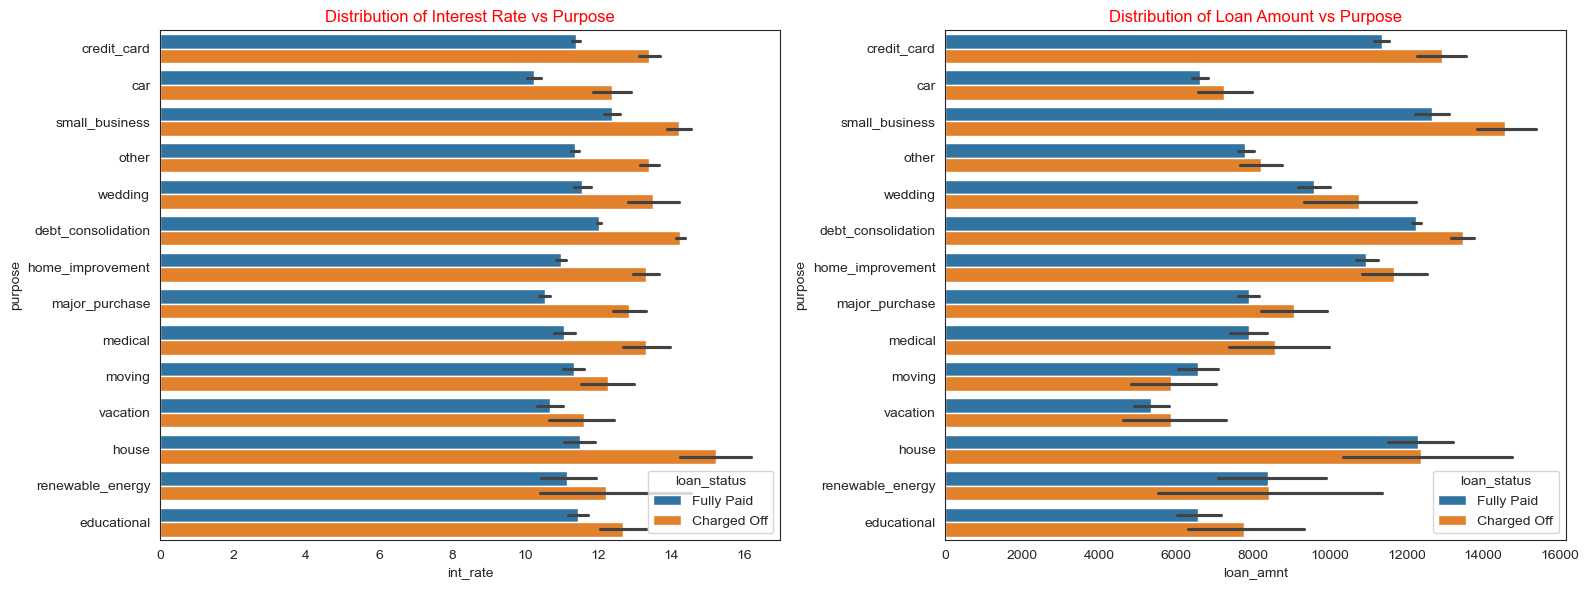

In [571]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(ax=axes[0],data=lendingdata, x="int_rate",y="purpose",hue='loan_status')
axes[0].set_title("Distribution of Interest Rate vs Purpose",color='red')
sns.barplot(ax=axes[1],data=lendingdata, x="loan_amnt",y="purpose",hue='loan_status')
axes[1].set_title("Distribution of Loan Amount vs Purpose",color='red')

plt.tight_layout()
plt.show()

#### Annual Income vs Purpose , DTI vs Purpose

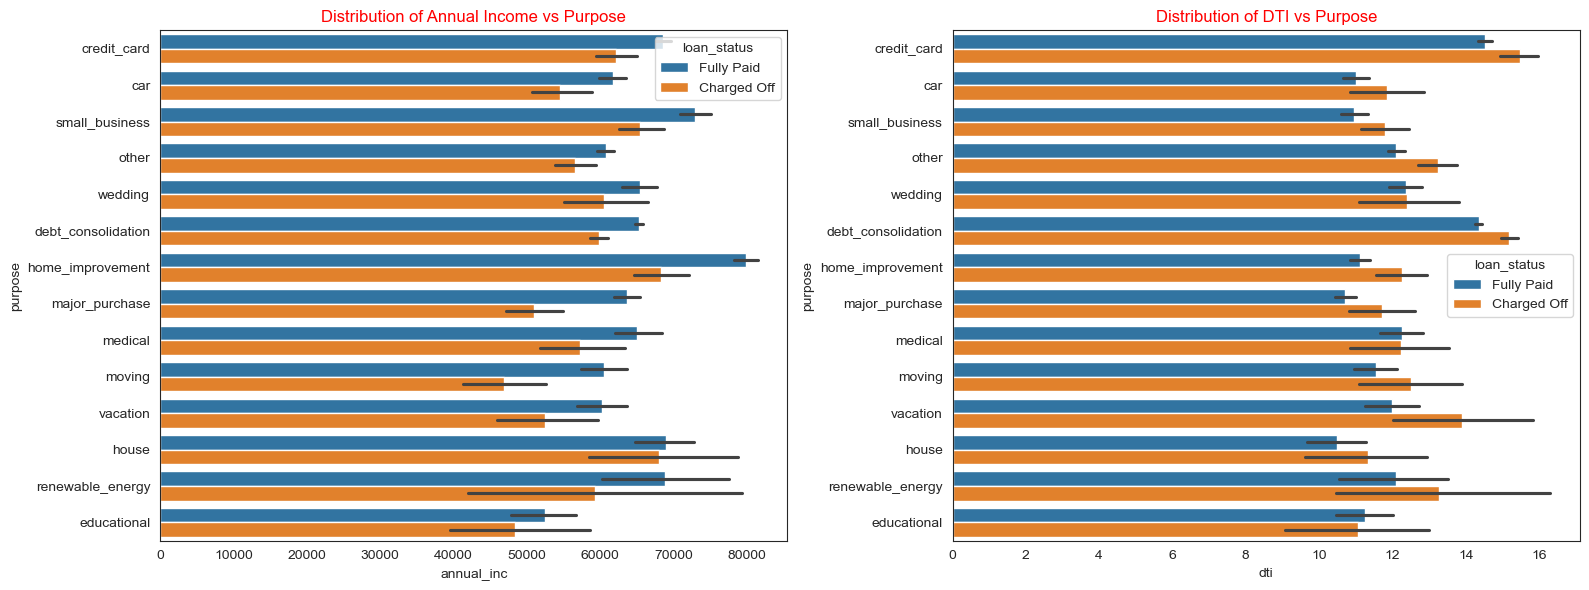

In [581]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(ax=axes[0],data=lendingdata, x="annual_inc",y="purpose",hue='loan_status')
axes[0].set_title("Distribution of Annual Income vs Purpose", color='red')
sns.barplot(ax=axes[1],data=lendingdata, x="dti",y="purpose",hue='loan_status')
axes[1].set_title("Distribution of DTI vs Purpose", color='red')

plt.tight_layout()
plt.show()

1. **Interest Rate vs. Purpose:**
    The interest rates for loans that were "Charged Off" are high when compared to "Fully Paid"
    For House and Small Business the rates are exceptionally high for "Charged Off" loans.
2. **Loan Amount vs. Purpose:**
    Loan amounts tend to be higher for loans that were "Charged Off" compared to "Fully Paid"
3. **Annual Income vs. Purpose:**
    Annual income levels tend to be higher for "Fully Paid" loans compared to "Charged Off" loans for most purposes.
4. **DTI vs. Purpose:**
    DTI ratios for "Charged Off" loans are generally higher compared to "Fully Paid" loans across most loan purposes.
5. **Summary:**
 **Higher interest rates, larger loan amounts for purposes like "small_business" and "home_improvement", higher DTI ratios
      are more likely to be charged off.**

#### Interest Rate vs Issue Year , Interest Rate vs Issue Month By Loan Status

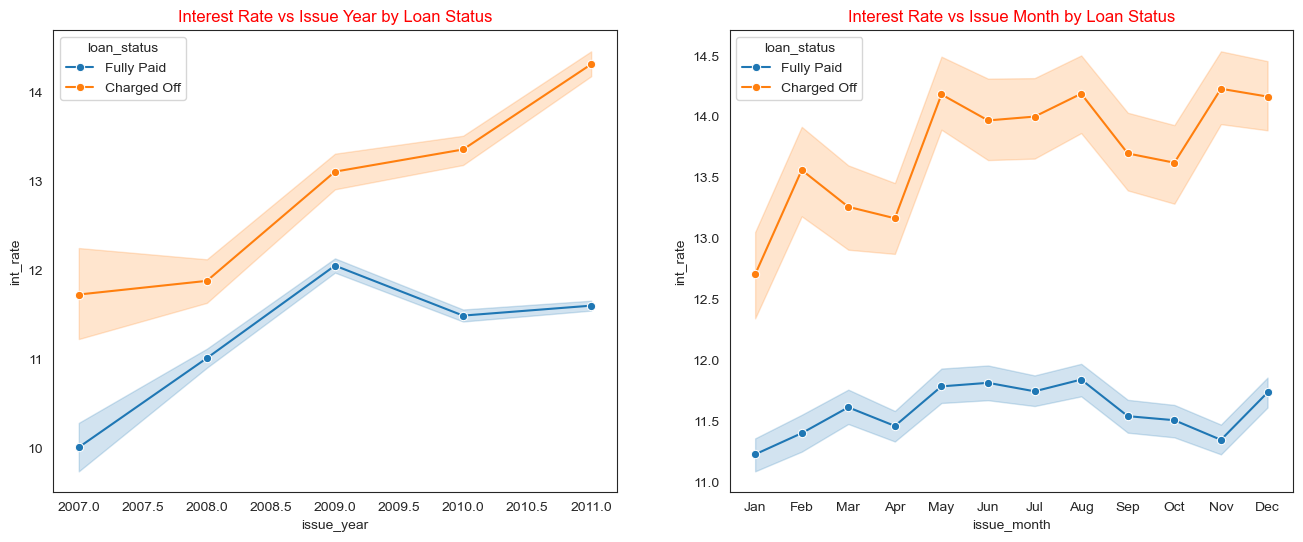

In [573]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
lendingdata['issue_month'] = pd.Categorical(lendingdata['issue_month'], categories=month_order, ordered=True)


sns.lineplot(ax=axes[0],y="int_rate", x="issue_year", hue='loan_status', data=lendingdata, marker='o')
axes[0].set_title('Interest Rate vs Issue Year by Loan Status',color='red')


sns.lineplot(ax=axes[1],y="int_rate", x="issue_month", hue='loan_status', data=lendingdata, marker='o')
axes[1].set_title('Interest Rate vs Issue Month by Loan Status',color='red')


plt.show()

1. **Interest Rate vs Issue Year**
Interest rates for "Charged Off" loans increase significantly over the years, peaking around 2011.
Interest rates for "Fully Paid" loans also increase over the years but at a slower rate 


2. **Interest Rate vs Issue Month**
Interest rates for "Charged Off" loans are generally higher across all months, with noticeable peaks in May, Aug and November.
Interest rates for "Fully Paid" loans show less variability and generally lower values across the months


#### Loan Amount vs Issue Year By Loan Status, Loan Amount vs Issue Month By Loan Status

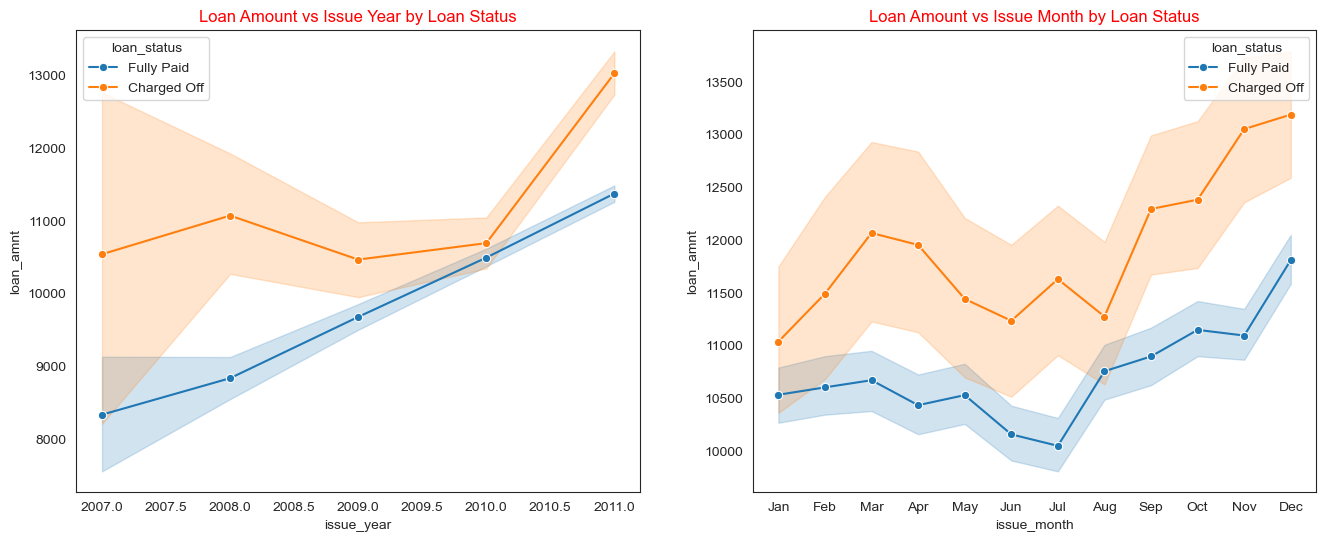

In [574]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(ax=axes[0],y="loan_amnt", x="issue_year", hue='loan_status', data=lendingdata, marker='o')
axes[0].set_title('Loan Amount vs Issue Year by Loan Status',color='red')


sns.lineplot(ax=axes[1],y="loan_amnt", x="issue_month", hue='loan_status', data=lendingdata, marker='o')
axes[1].set_title('Loan Amount vs Issue Month by Loan Status',color='red')


plt.show()

1. **Loan Amount vs Issue Year**
   Loan Amounts for Charged Off are usually higher when compared to Fully Paid across all the Years
   For Fully Paid loans the loan amount has increased consistently over years and observed peak in 2011
   For Charged Off loans, we can see it increased and deacreased till 2010 and observed a sudden peak in 2011
2. **Loan Amount vs Issue Month**
   Loan Amounts for Charged Off are usually higher when compared to Fully Paid across all Months
   For "Fully Paid" loans show less variability till for first few months and increased in later months of the year.
   For Charged Off loans show high variability and increased in later months of the year.

#### DTI vs Issue Year By Loan Status, DTI vs Issue Month By Loan Status

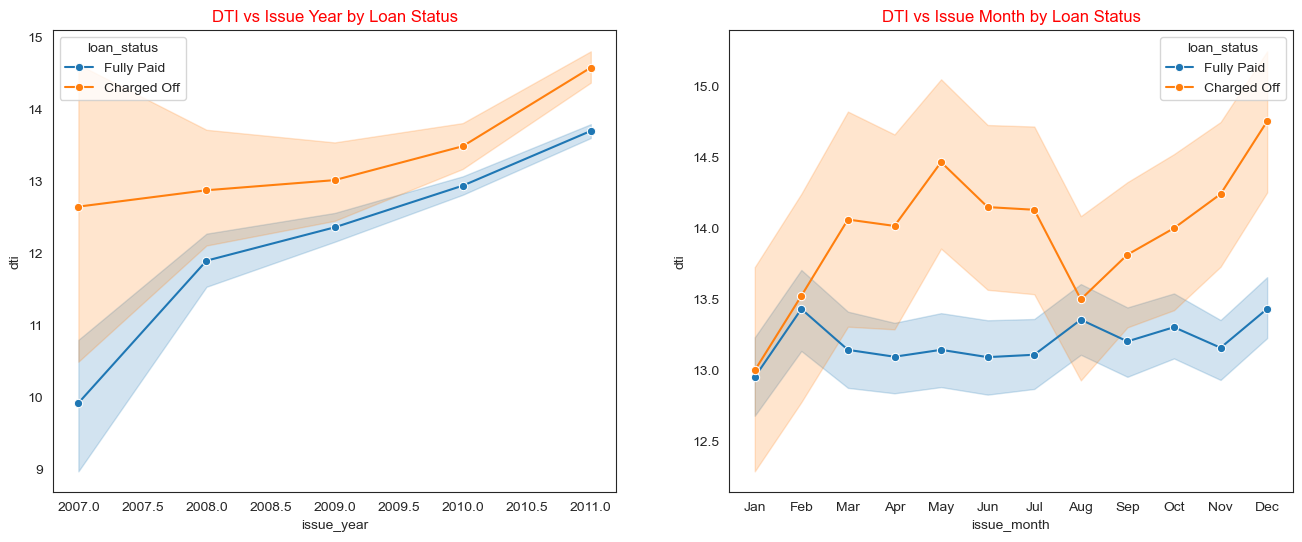

In [575]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(ax=axes[0],y="dti", x="issue_year", hue='loan_status', data=lendingdata, marker='o')
axes[0].set_title('DTI vs Issue Year by Loan Status', color='red')


sns.lineplot(ax=axes[1],y="dti", x="issue_month", hue='loan_status', data=lendingdata, marker='o')
axes[1].set_title('DTI vs Issue Month by Loan Status',color='red')


plt.show()

1. DTI vs Issue Year:
   DTI ratios for "Charged Off" loans increase significantly over the years, peaking around 2011.
   DTI ratios for "Fully Paid" peaked in 2008 significantly increased over the years, peaking around 2011.
2. DTI vs Issue Month:
   DTI ratios for "Charged Off" loans show significant variability across the months
   DTI ratios for "Fully Paid" loans are generally more stable with slight increases in the later months of the year.

#### OpenAccoutnts vs Issue Month By LoanStatus

loan_status  Fully Paid  Charged Off
issue_month                         
Jan            0.870815     0.129185
Feb            0.882087     0.117913
Mar            0.872807     0.127193
Apr            0.866794     0.133206
May            0.835469     0.164531
Jun            0.848168     0.151832
Jul            0.857888     0.142112
Aug            0.871801     0.128199
Sep            0.843418     0.156582
Oct            0.847579     0.152421
Nov            0.848778     0.151222
Dec            0.839635     0.160365


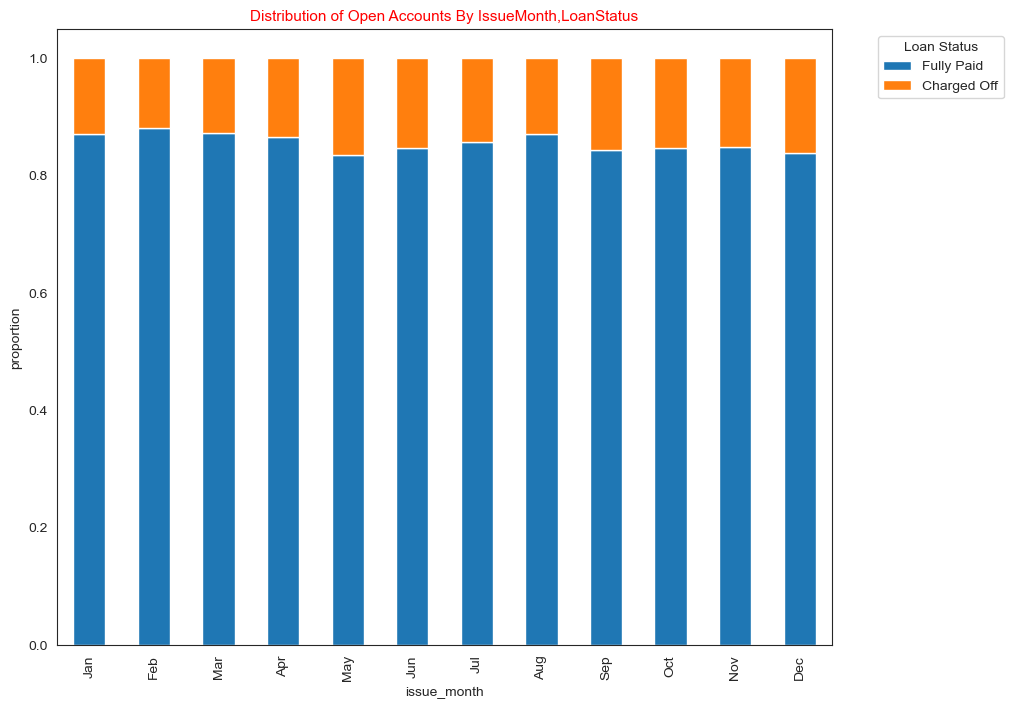

In [577]:
monthly_acc = pd.pivot_table(lendingdata, values='open_acc', index='issue_month', columns='loan_status', aggfunc=sum)
open_acc_perc = monthly_acc[['Fully Paid' ,'Charged Off']].apply(lambda x : x/x.sum(), axis = 1)
print(open_acc_perc)
open_acc_perc.plot(kind="bar", stacked=True,  figsize=(10,8))
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('proportion')
plt.title("Distribution of Open Accounts By IssueMonth,LoanStatus", color='red', fontsize =11)
plt.show()

1. The voulme of open accounts has increased from May considerably, consequently the defaulters also increased.

#### delinq_2yrs By Grade, LoanStatus

In [379]:
pvt = pd.pivot_table(lendingdata,index=['grade','loan_status'],values="delinq_2yrs",aggfunc=np.sum)
print(pvt)

                   delinq_2yrs
grade loan_status             
A     Charged Off           41
      Fully Paid           406
B     Charged Off          153
      Fully Paid          1200
C     Charged Off          220
      Fully Paid          1248
D     Charged Off          238
      Fully Paid          1008
E     Charged Off          151
      Fully Paid           458
F     Charged Off          107
      Fully Paid           206
G     Charged Off           42
      Fully Paid            84


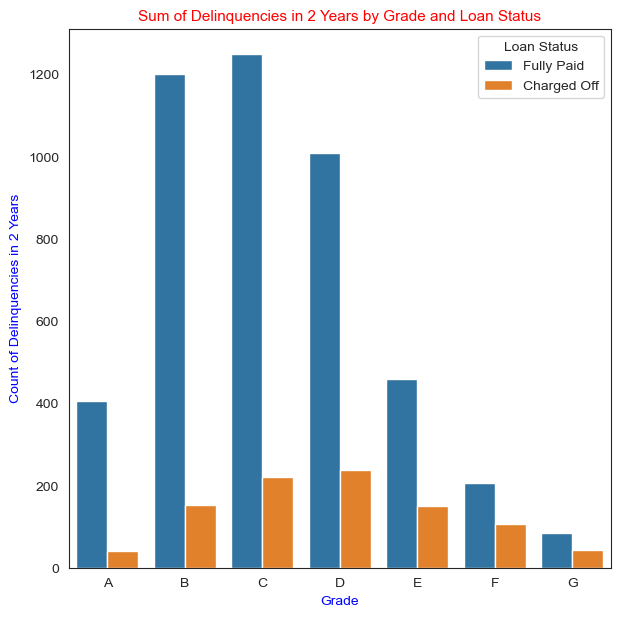

In [578]:
plt.figure(figsize=(7, 7))
sns.barplot(x='grade', y='delinq_2yrs',hue_order=['Fully Paid','Charged Off'], hue='loan_status', data=pvt)
plt.title('Sum of Delinquencies in 2 Years by Grade and Loan Status',color='red',fontsize=11)
plt.xlabel('Grade', color='blue')
plt.ylabel('Count of Delinquencies in 2 Years',color='blue')
plt.legend(title='Loan Status')
plt.show()

#### pub_rec_bankruptcies By Grade,LoanStatus

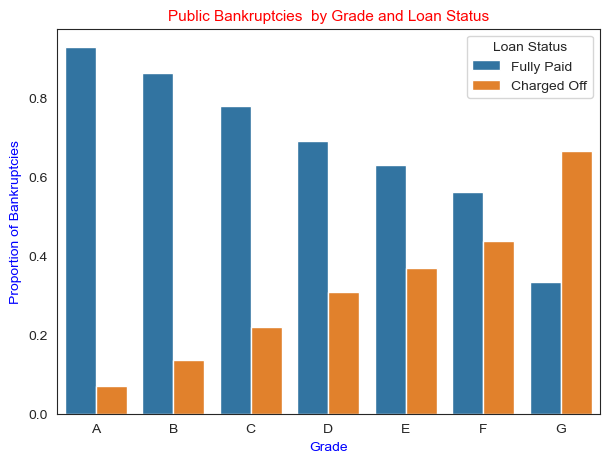

In [530]:
pvt_pub_bankrupt = pd.pivot_table(lendingdata,index=['grade','loan_status'],values="pub_rec_bankruptcies",aggfunc=np.sum).reset_index()

total_delinq_by_grade = pvt_pub_bankrupt.groupby('grade')['pub_rec_bankruptcies'].transform('sum')

# Step 3: Calculate the proportion of delinquencies
pvt_pub_bankrupt['proportion'] = pvt_pub_bankrupt['pub_rec_bankruptcies'] / total_delinq_by_grade

plt.figure(figsize=(7, 5))
sns.barplot(x='grade', y='proportion', hue='loan_status', hue_order=['Fully Paid','Charged Off'] ,data=pvt_pub_bankrupt)
plt.title('Public Bankruptcies  by Grade and Loan Status', fontsize=11, color ='red')
plt.xlabel('Grade',color='blue')
plt.ylabel('Proportion of Bankruptcies',color='blue')
plt.legend(title='Loan Status')
plt.show()

The percentage of getting Bankrupt increases as we move from high grade to low grade, so as the risk of ChargedOff increases.

## Correlation between two catg variables for ChargedOff Data

In [386]:
issue_year_grade = pd.crosstab(defaulters['issue_year'], defaulters['grade'])
homeownership_emplen = pd.crosstab(defaulters['home_ownership'], defaulters['emp_length'])
purpose_emplength = pd.crosstab(defaulters['purpose'], defaulters['emp_length'])

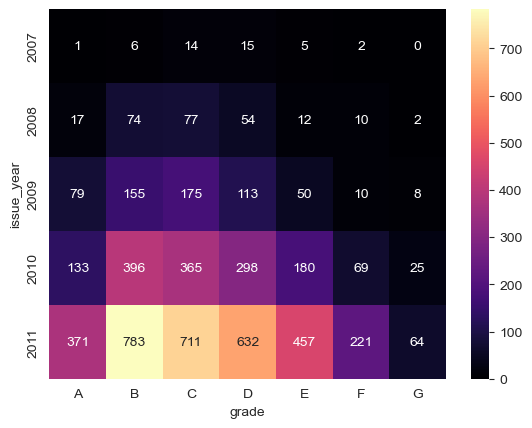

In [390]:
sns.heatmap(issue_year_grade,annot=True, fmt="d", cmap='magma')
plt.show()

1. More number of chargedoff loans have been defualted across B,C,D,E category across the years 
   and in 2011 the numbers increased drastically

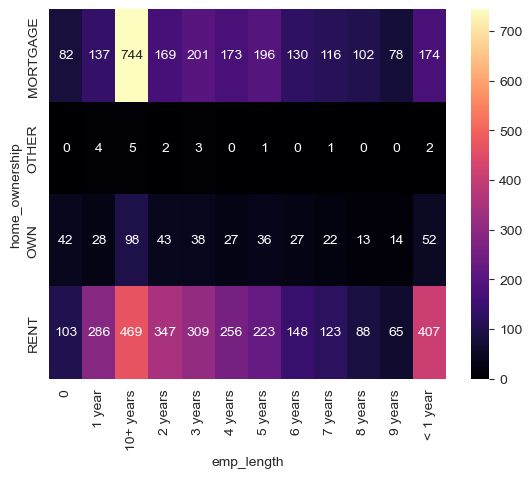

In [391]:
sns.heatmap(homeownership_emplen,annot=True, fmt="d", cmap='magma')
plt.show()

Charged of Applicants with home ownership status as Mortgage with stable employment have defaulted most

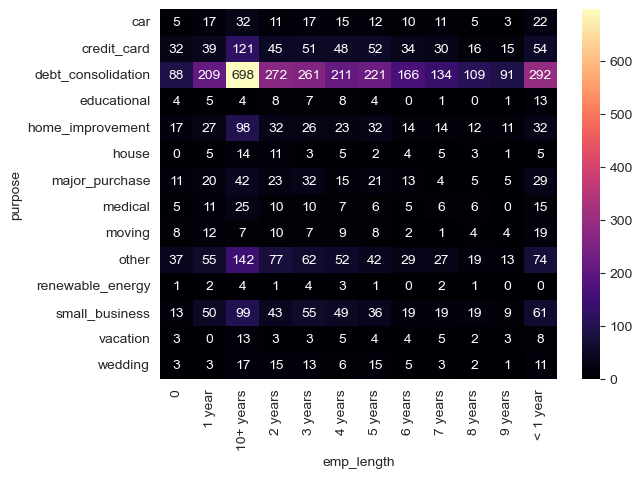

In [579]:
sns.heatmap(purpose_emplength,annot=True, fmt="d", cmap='magma')
plt.show()

1. It is observed more number of chargedoff appicants with stable employment have been granted loan 
   taken for the purpose of debt_consolidation